## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from datetime import datetime

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.holtwinters import ExponentialSmoothing

## Daily

We first try and make predictions from the data where we get daily temperature predictions. <br>
We also scale the number of calls made on a daily basis, by simply dividing it by 100.

In [2]:
df =  pd.read_csv('311_borough_weather.csv')
df

Y-M-d        Borough  Count        Date  DailyMeanTemp  \
0     2016-01-01          BRONX    689  2016-01-01      41.250000   
1     2016-01-01       BROOKLYN    858  2016-01-01      41.250000   
2     2016-01-01      MANHATTAN    558  2016-01-01      41.250000   
3     2016-01-01         QUEENS    606  2016-01-01      41.250000   
4     2016-01-01  STATEN ISLAND     69  2016-01-01      41.250000   
...          ...            ...    ...         ...            ...   
6571  2018-12-31       BROOKLYN   1382  2018-12-31      47.500135   
6572  2018-12-31      MANHATTAN    652  2018-12-31      47.500135   
6573  2018-12-31         QUEENS    939  2018-12-31      47.500135   
6574  2018-12-31  STATEN ISLAND    213  2018-12-31      47.500135   
6575  2018-12-31    Unspecified     14  2018-12-31      47.500135   

      DailyTempStd  
0         0.758068  
1         0.758068  
2         0.758068  
3         0.758068  
4         0.758068  
...            ...  
6571     12.899035  
6572     12.899035  
6573     12.899035  
6574     12.899035  
6575     12.899035  

[6576 rows x 6 columns]

We look at the distribution of the number of calls on a daily basis and notice an increasing pattern.
We also perform an Augmented Dickey Fuller test

======================= BRONX =======================


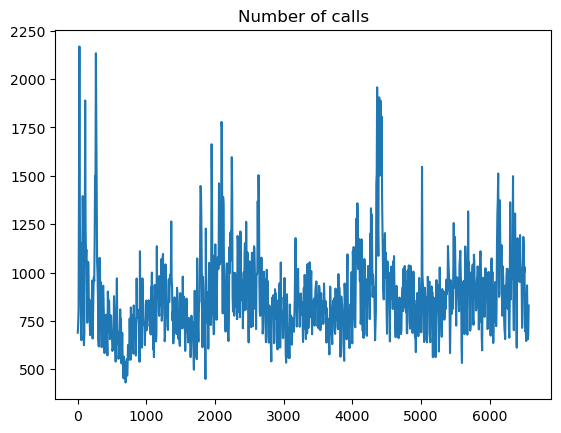

ADF Statistic on the entire dataset: -4.423379945270952
p-value: 0.0002697941382569559
Critical Values:
	1%: -3.4364533503600962
	5%: -2.864234857527328
	10%: -2.568204837482531
======================= BROOKLYN =======================


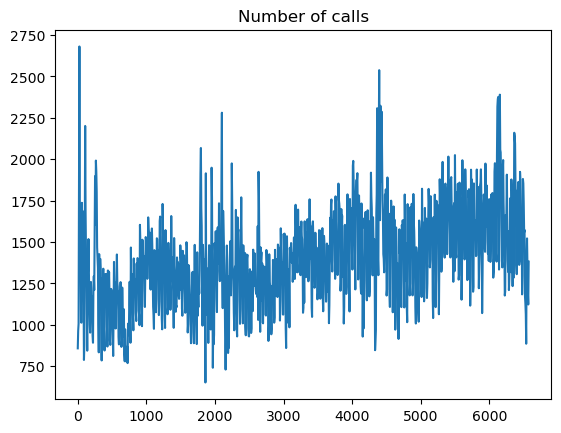

ADF Statistic on the entire dataset: -3.284463793851395
p-value: 0.01558738840238037
Critical Values:
	1%: -3.4364533503600962
	5%: -2.864234857527328
	10%: -2.568204837482531
======================= MANHATTAN =======================


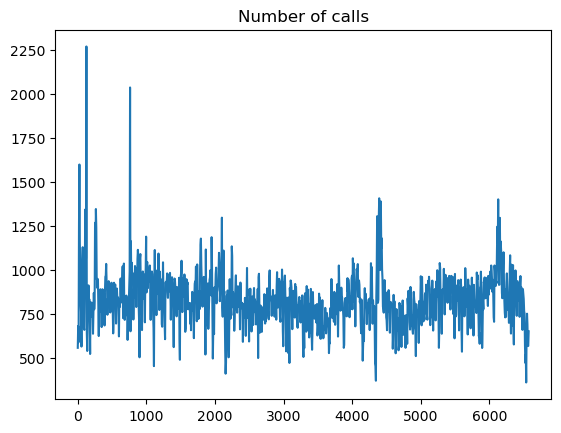

ADF Statistic on the entire dataset: -5.5550474719949845
p-value: 1.587909124763673e-06
Critical Values:
	1%: -3.4364533503600962
	5%: -2.864234857527328
	10%: -2.568204837482531
======================= QUEENS =======================


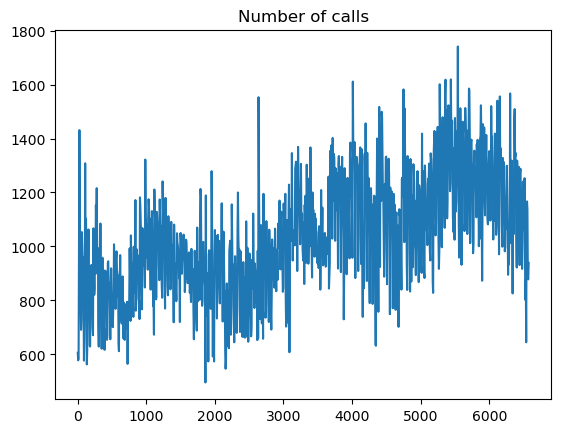

ADF Statistic on the entire dataset: -2.2686065006813925
p-value: 0.18229294274232644
Critical Values:
	1%: -3.436459052172655
	5%: -2.864237372528562
	10%: -2.568206176974609
======================= STATEN ISLAND =======================


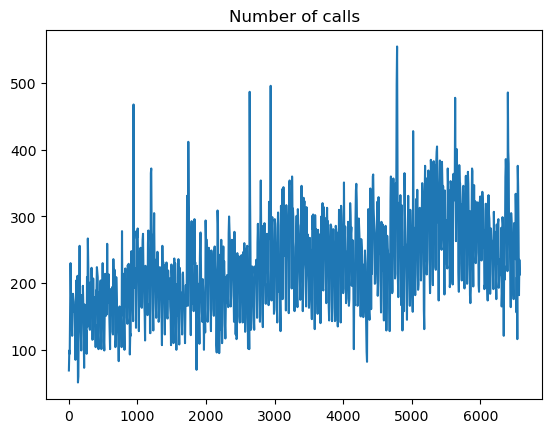

ADF Statistic on the entire dataset: -3.1029595192590085
p-value: 0.026334944645917374
Critical Values:
	1%: -3.436459052172655
	5%: -2.864237372528562
	10%: -2.568206176974609
======================= Unspecified =======================


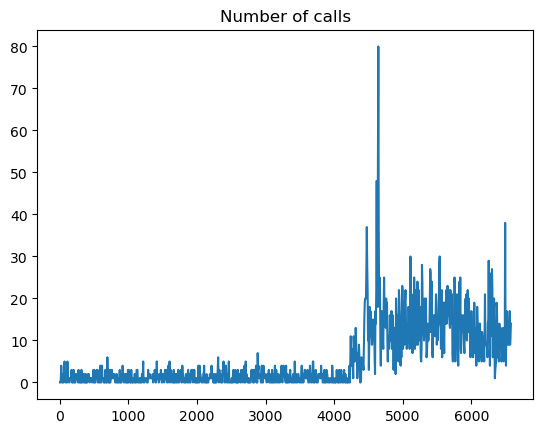

ADF Statistic on the entire dataset: -1.6904697607737234
p-value: 0.4360293112493317
Critical Values:
	1%: -3.4364533503600962
	5%: -2.864234857527328
	10%: -2.568204837482531


In [3]:
for i in df['Borough'].unique():

    print(f'======================= {i} =======================')
    train_portion = df[df['Borough'] == i]

    plt.plot(train_portion['Count'])
    plt.title('Number of calls')
    plt.show()

    result = adfuller(train_portion['Count'])
    print('ADF Statistic on the entire dataset: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

We take the first difference and then plot the distribution. We also perform the ADF test and notice a much smaller p-value

======================= BRONX =======================


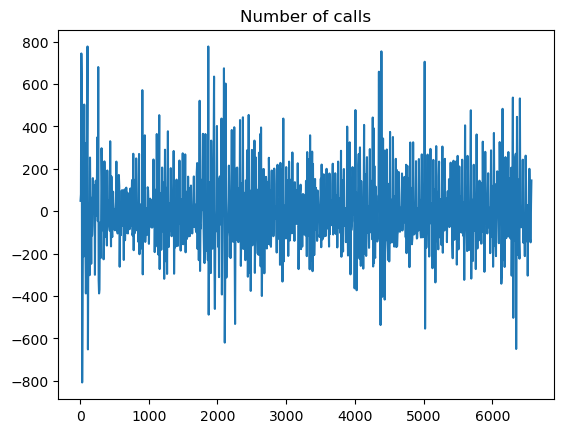

ADF Statistic on the entire dataset: -10.882451369635028
p-value: 1.2845574470053968e-19
Critical Values:
	1%: -3.4364533503600962
	5%: -2.864234857527328
	10%: -2.568204837482531
======================= BROOKLYN =======================


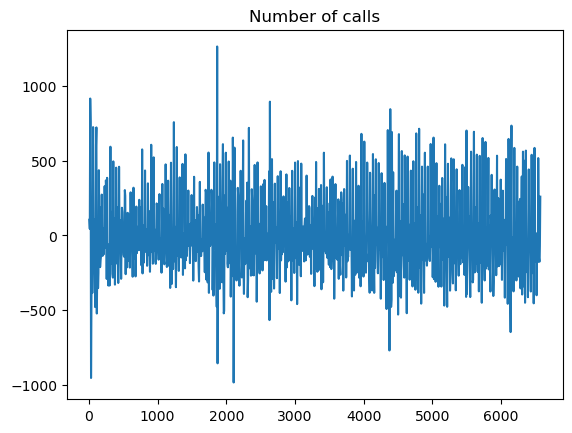

ADF Statistic on the entire dataset: -10.633840527674485
p-value: 5.13241447642453e-19
Critical Values:
	1%: -3.4364533503600962
	5%: -2.864234857527328
	10%: -2.568204837482531
======================= MANHATTAN =======================


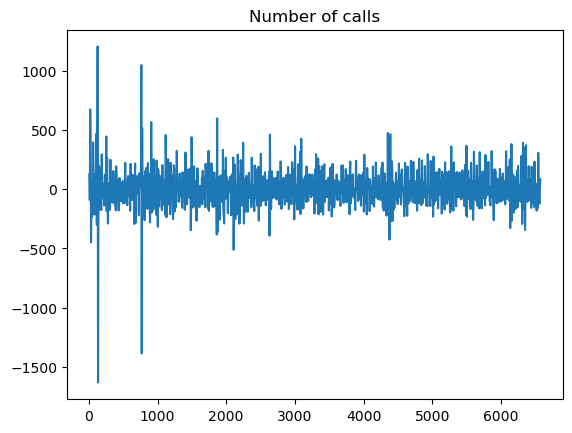

ADF Statistic on the entire dataset: -11.055256429433967
p-value: 4.963428064270033e-20
Critical Values:
	1%: -3.4364647646486093
	5%: -2.864239892228526
	10%: -2.5682075189699822
======================= QUEENS =======================


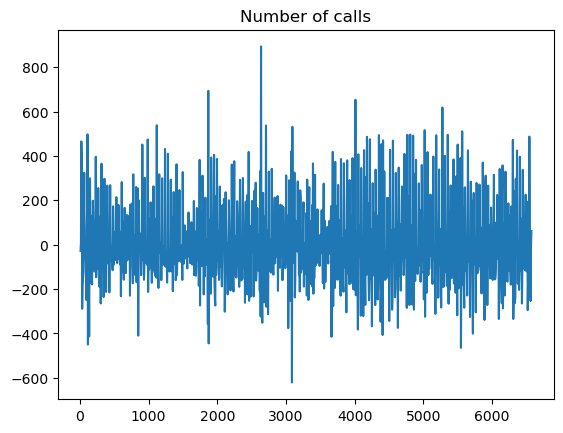

ADF Statistic on the entire dataset: -9.368390118980686
p-value: 7.49186355564486e-16
Critical Values:
	1%: -3.436459052172655
	5%: -2.864237372528562
	10%: -2.568206176974609
======================= STATEN ISLAND =======================


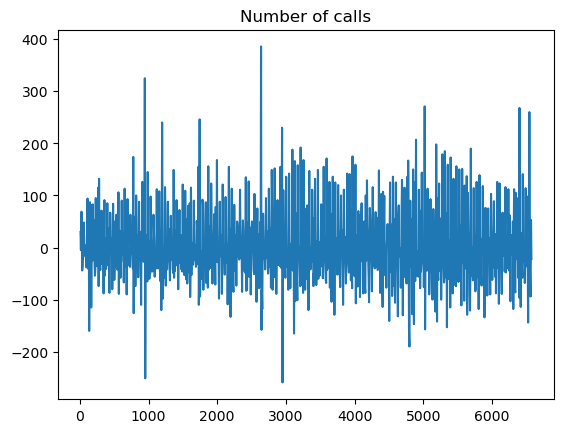

ADF Statistic on the entire dataset: -9.745074862819818
p-value: 8.297502366029841e-17
Critical Values:
	1%: -3.4364647646486093
	5%: -2.864239892228526
	10%: -2.5682075189699822
======================= Unspecified =======================


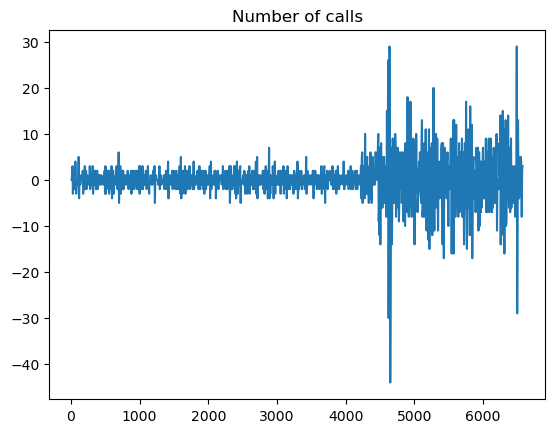

ADF Statistic on the entire dataset: -11.175742398448035
p-value: 2.5735925169455556e-20
Critical Values:
	1%: -3.4364533503600962
	5%: -2.864234857527328
	10%: -2.568204837482531


In [4]:
for i in df['Borough'].unique():

    print(f'======================= {i} =======================')
    train_portion = df[df['Borough'] == i]

    num_calls_first_diff = train_portion['Count'].diff()[1:]

    plt.plot(num_calls_first_diff)
    plt.title('Number of calls')
    plt.show()

    result = adfuller(num_calls_first_diff)
    print('ADF Statistic on the entire dataset: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

We find the values for p and q using the PACF and ACF plots

/Users/pranavkarnani/miniconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


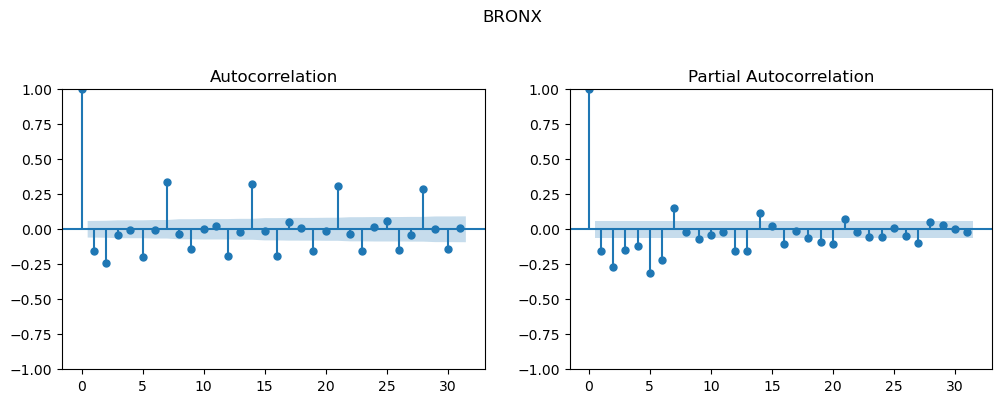

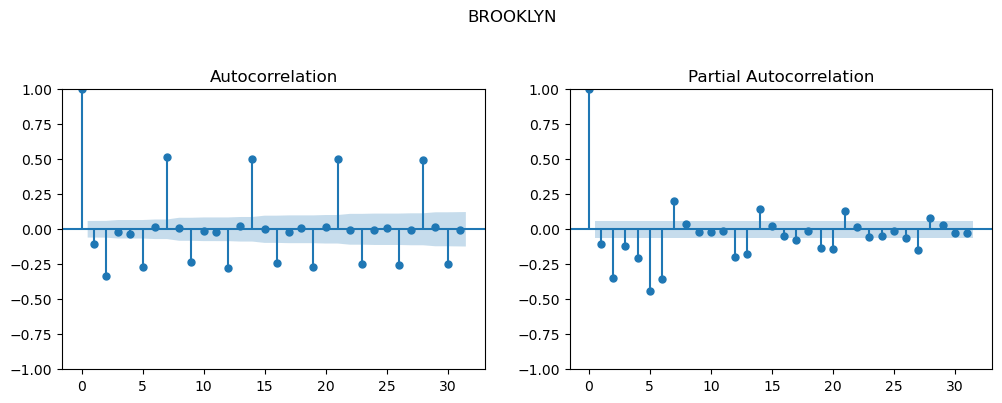

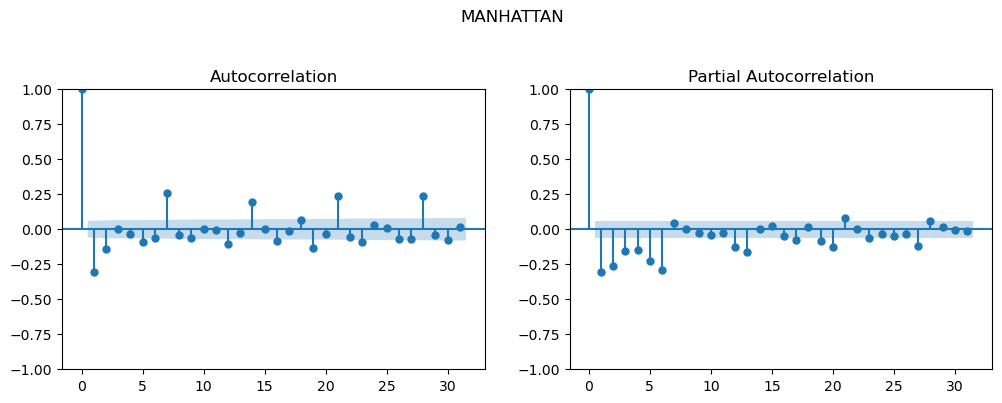

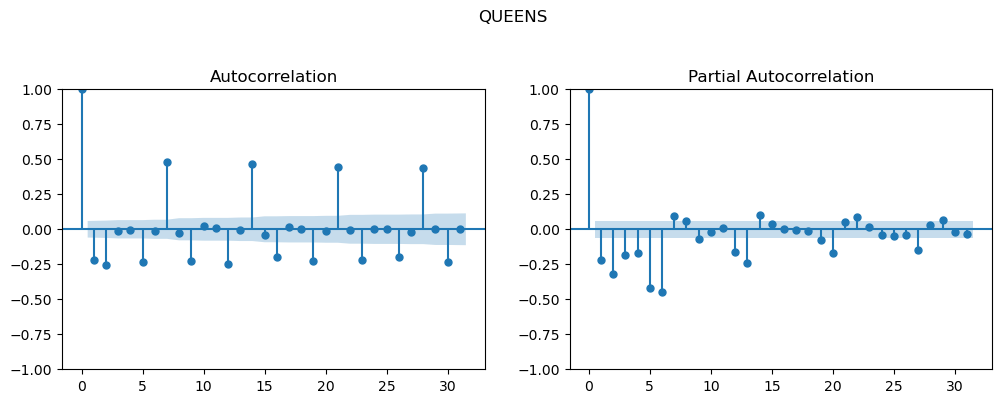

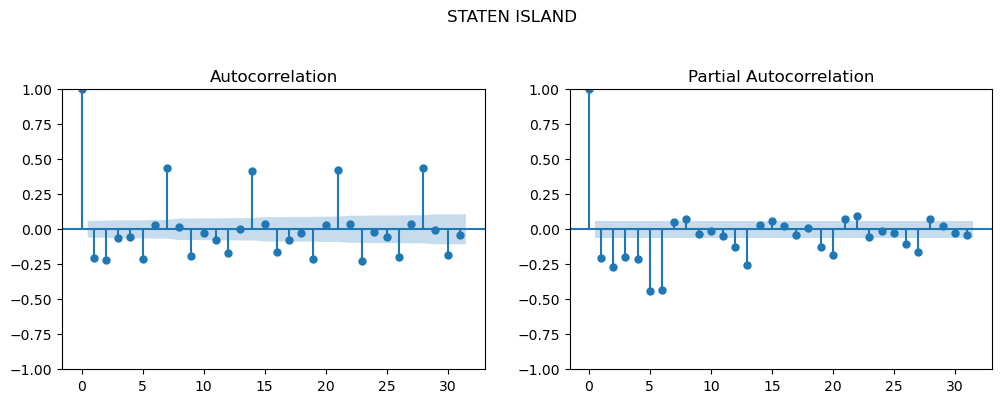

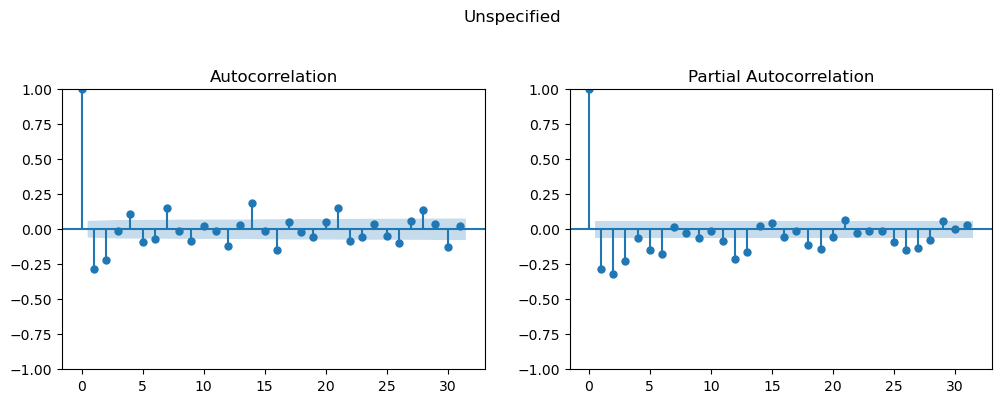

In [5]:
boroughs_trend = ['BROOKLYN', 'QUEENS', 'STATEN ISLAND']

for i in df['Borough'].unique():

    if i in boroughs_trend:
        data = df[df['Borough'] == i]['Count'].diff()[1:]
    else:
        data = df[df['Borough'] == i]['Count'].diff()[1:]

    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(2,2,1)
    fig = sm.graphics.tsa.plot_acf(data, ax=ax1)
    ax2 = fig.add_subplot(2,2,2)
    fig = sm.graphics.tsa.plot_pacf(data, ax=ax2)
    fig.suptitle(i)


In [6]:
boroughs_order = {
    'BRONX': (7,0,2),
    'BROOKLYN': (7,1,2),
    'MANHATTAN': (6,0,2),
    'QUEENS': (6,1,2),
    'STATEN ISLAND': (6,1,2)
}

We now fit a time series model - ARIMA with cross validation and without any exogenous variables to get a baseline estimate.

In [7]:
import warnings
warnings.simplefilter("ignore")

In [8]:
results = {}

BRONX


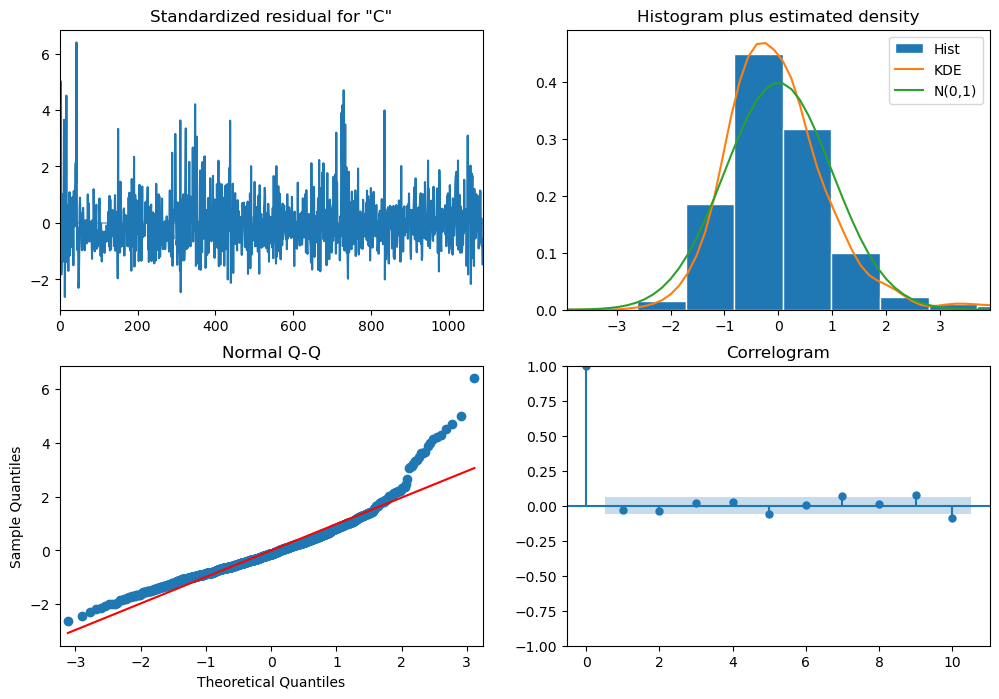

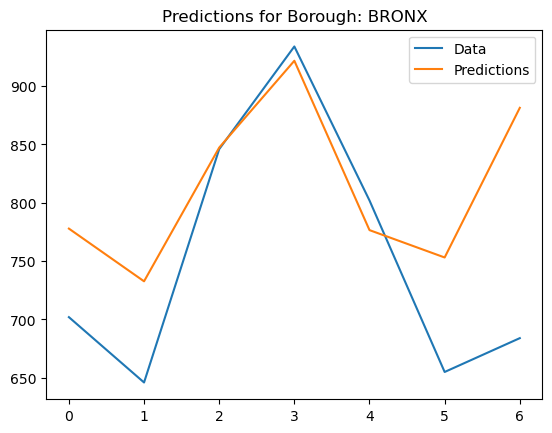

Average RMSE: 28977.747739079972
Average MAPE: 0.14641380870297163

BROOKLYN


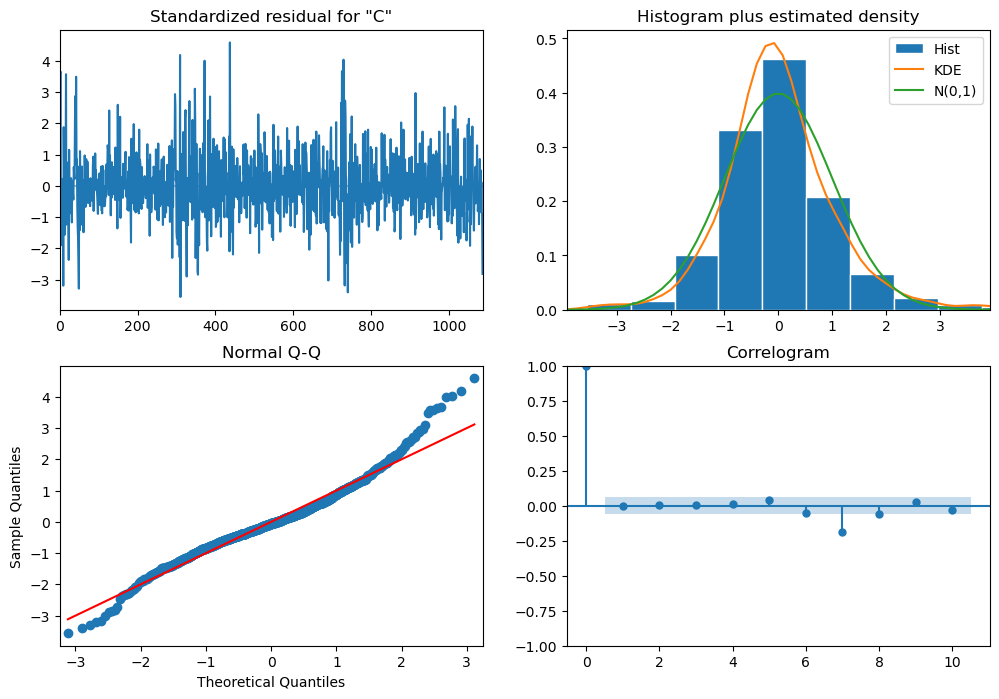

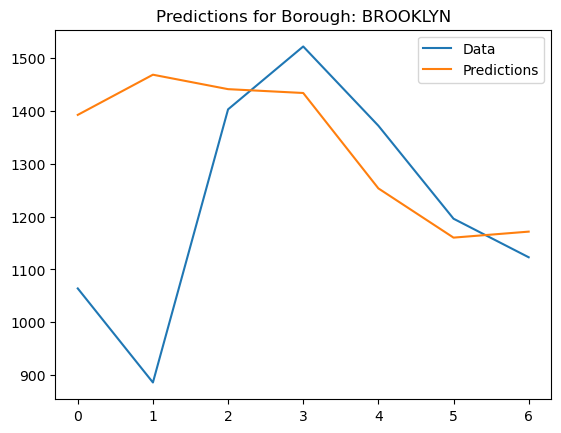

Average RMSE: 87971.72591291484
Average MAPE: 0.14229297087143308

MANHATTAN


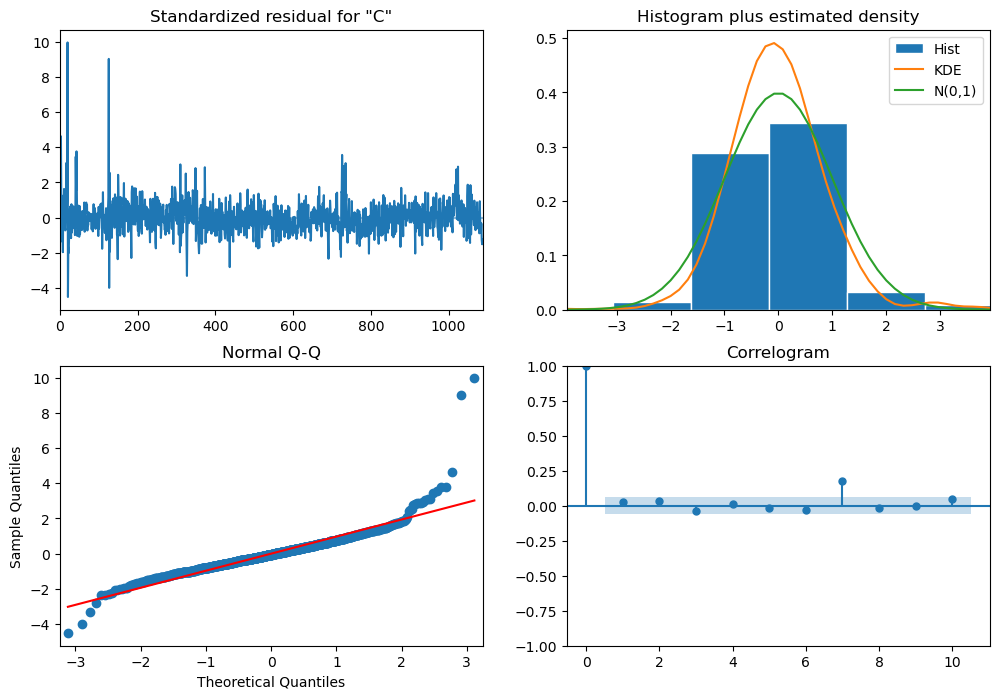

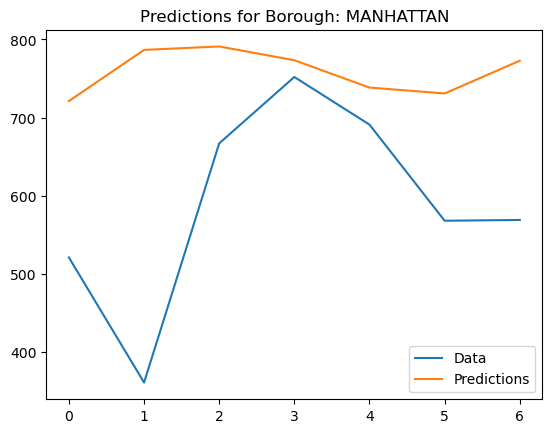

Average RMSE: 16960.445542507678
Average MAPE: 0.11433630577300577

QUEENS


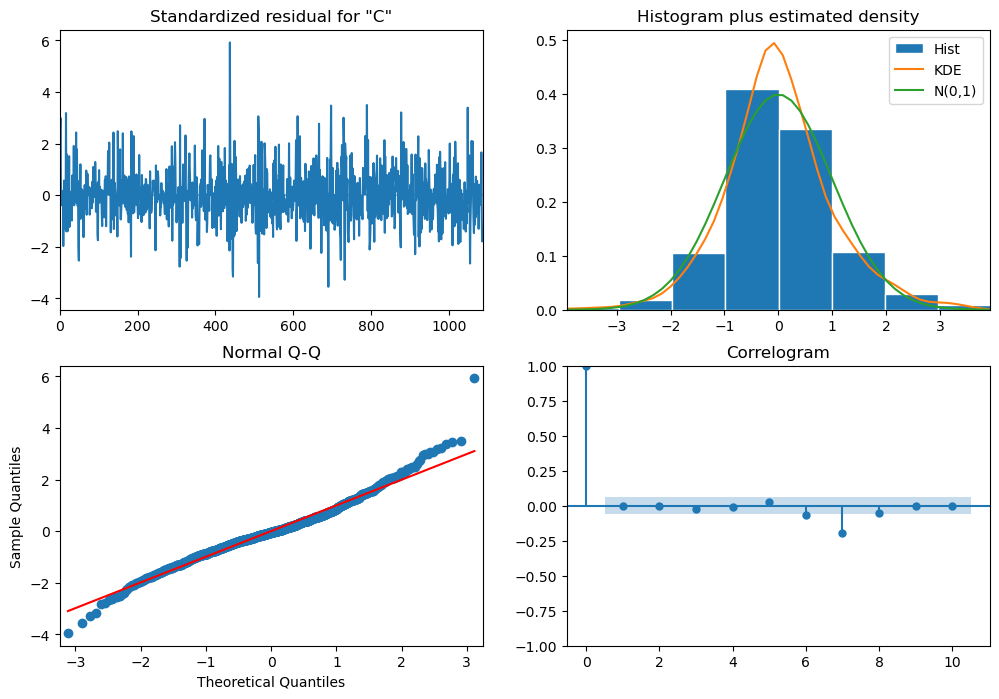

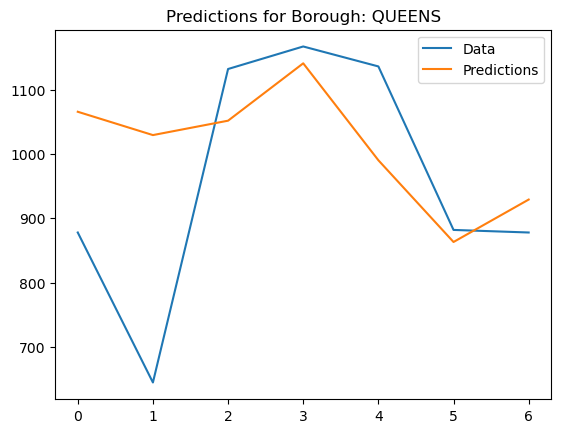

Average RMSE: 35792.22703167386
Average MAPE: 0.12213488330591213

STATEN ISLAND


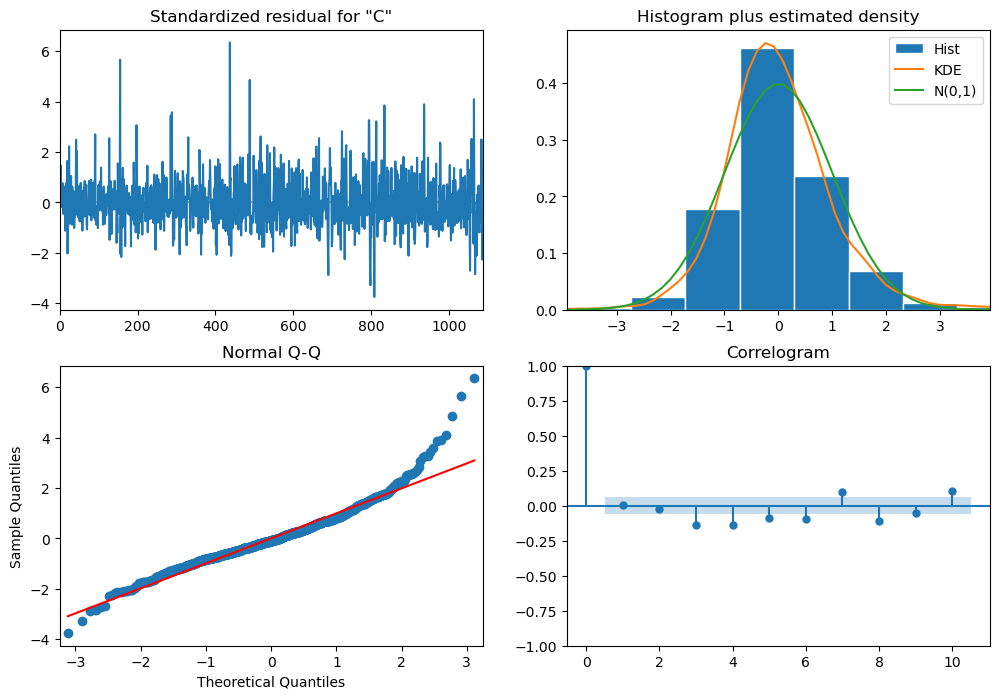

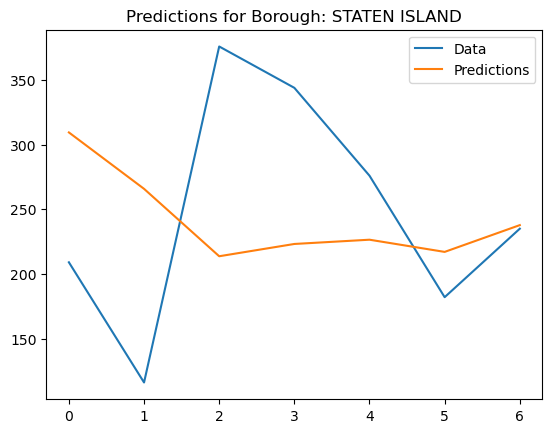

Average RMSE: 9819.494049824714
Average MAPE: 0.3012256839966039



In [9]:
num_folds = 5

for i in boroughs_order.keys():
    print(i)
    train_portion = df[df['Borough'] == i].reset_index()

    rmse = []
    mape = []
    for j in range(num_folds):

        train_data = train_portion['Count'][1:-(7 * (num_folds-j))]
        val_data = train_portion['Count'][(-7 * (num_folds-j))-1: -7 * (num_folds-j-1)-1]

        model = ARIMA(train_data, order = boroughs_order[i])
        model_fit = model.fit(method_kwargs={"warn_convergence": False})
        
        predictions = model_fit.get_forecast(7)

        prediction = predictions.predicted_mean
        prediction_range = predictions.conf_int(alpha=0.05)
        deviation = (prediction - prediction_range.iloc[:,-1])/2

        rmse.append(mean_squared_error(prediction, list(val_data)))
        mape.append(mean_absolute_percentage_error(prediction, list(val_data)))

    rmse = np.array(rmse)
    mape = np.array(mape)

    model_fit.plot_diagnostics(figsize=(12, 8))
    plt.show()

    plt.plot(range(len(val_data)), val_data.values)
    plt.plot(range(len(val_data)), prediction.values)
    plt.title(f'Predictions for Borough: {i}')
    plt.legend(('Data', 'Predictions'))
    plt.show()

    print(f'Average RMSE: {np.mean(rmse)}')
    print(f'Average MAPE: {np.mean(mape)}')

    results[f'ARIMA_MAPE_{i}'] = np.mean(mape)
    # print(model_fit.summary())

    print()


We now incorporate the daily temperature as an exogenous variable and observe a smaller AIC score. The p-value for the feature is also < 0.05, implying that temperature is a statistically significant feature.

BRONX


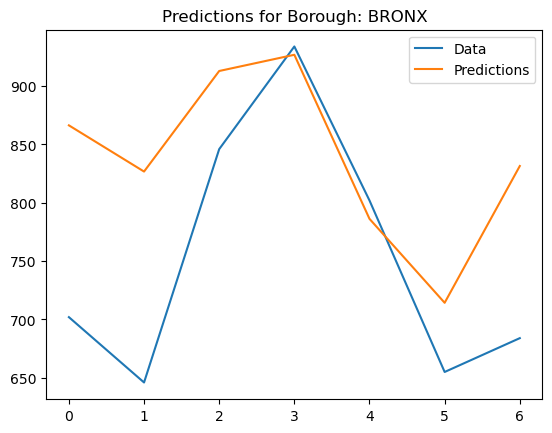

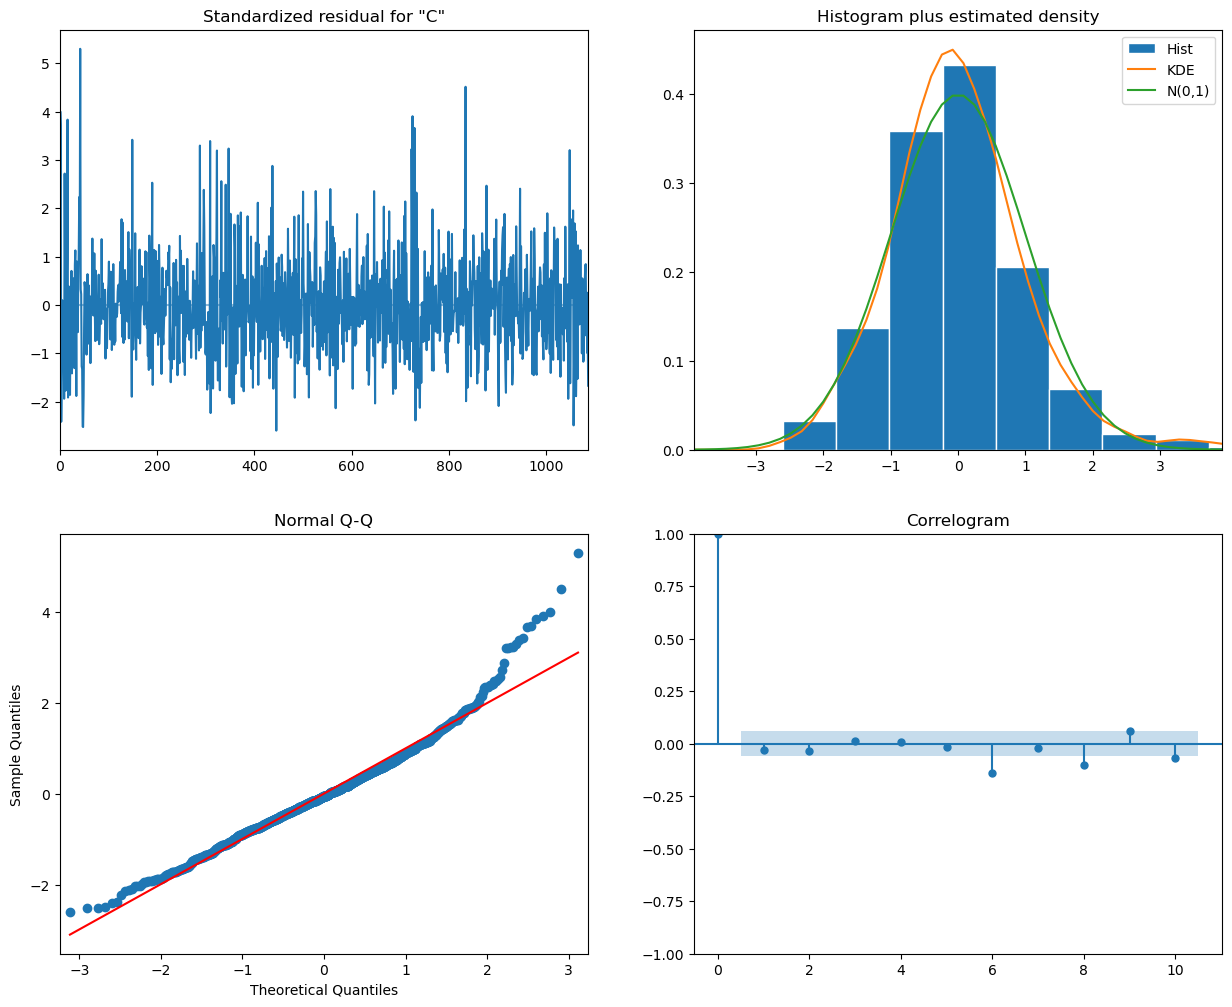

Average RMSE: 28646.419689928232
Average MAPE: 0.12979357481065157

BROOKLYN


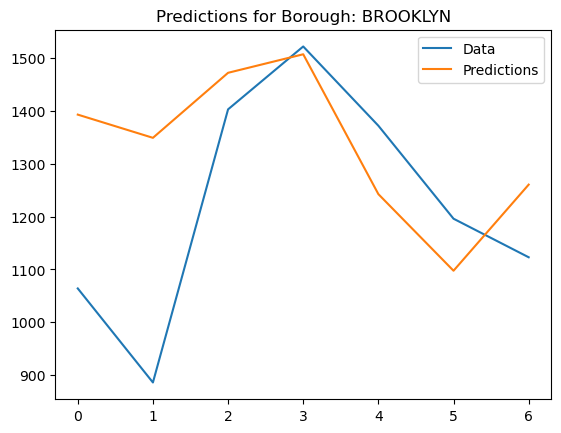

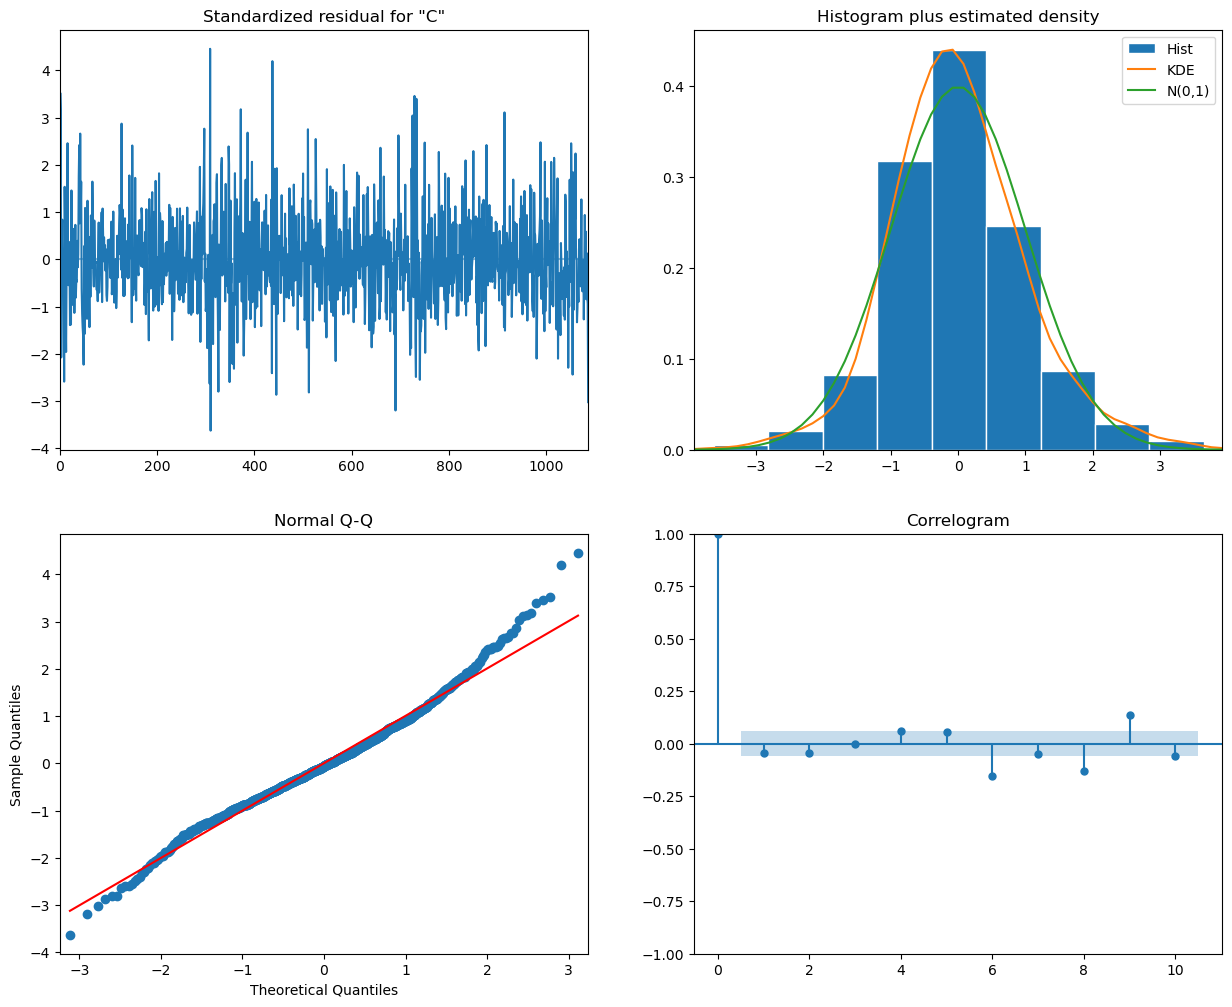

Average RMSE: 90143.22947230897
Average MAPE: 0.14524433198438066

MANHATTAN


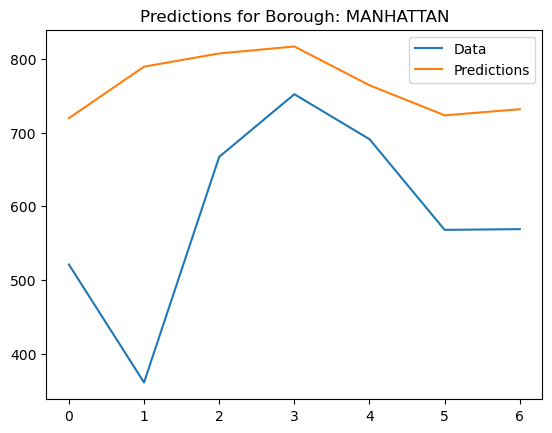

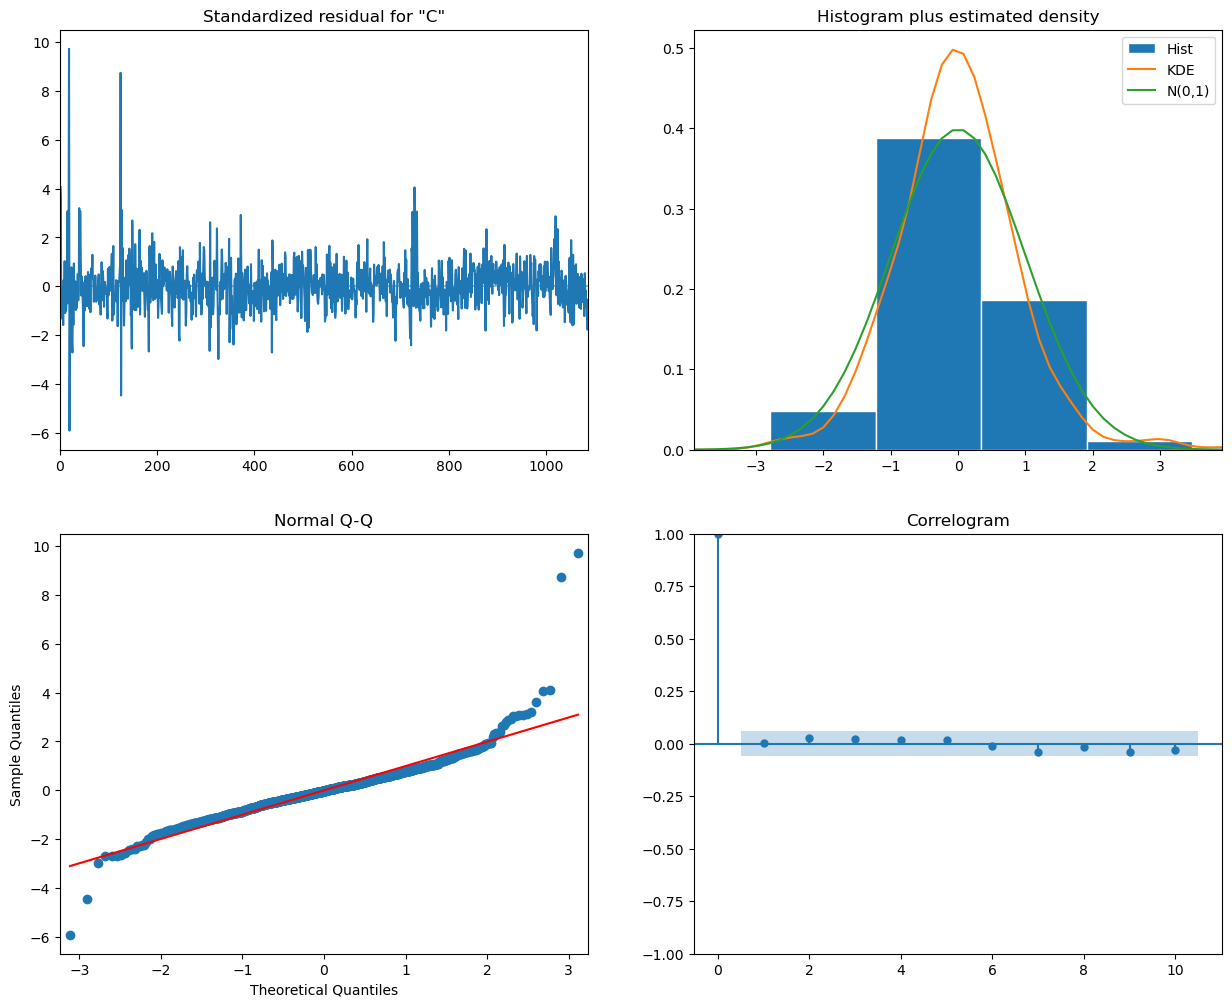

Average RMSE: 21041.121191830294
Average MAPE: 0.12366835706821822

QUEENS


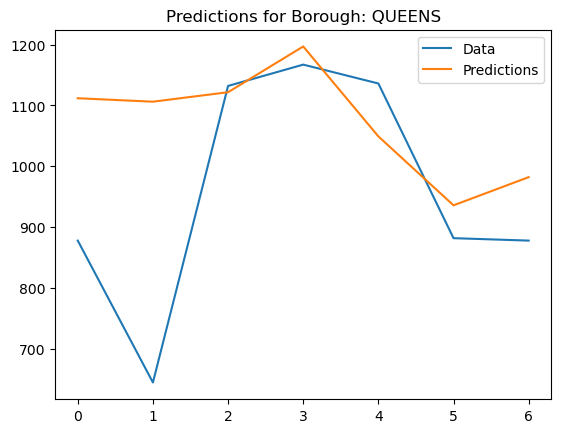

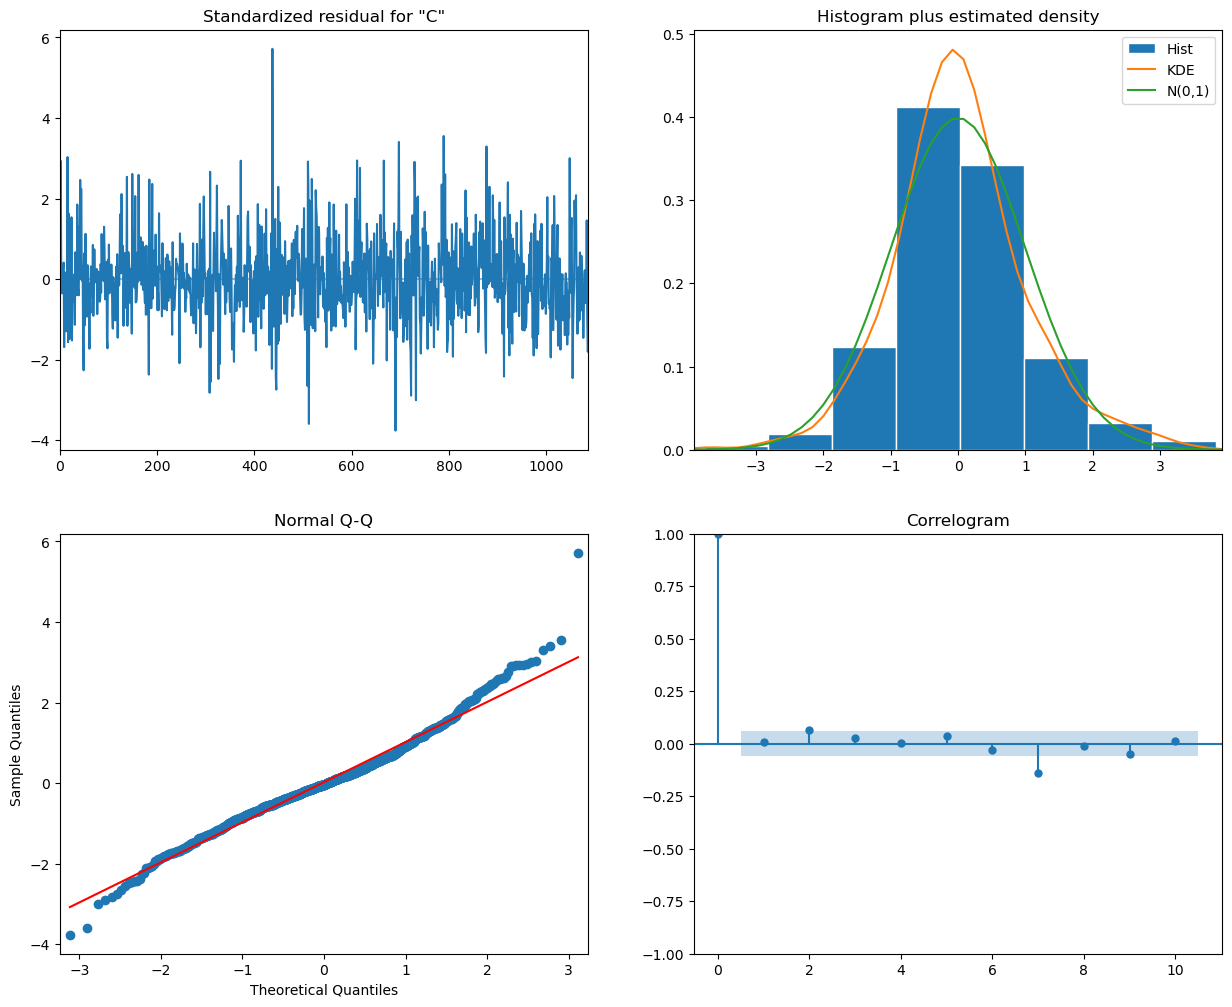

Average RMSE: 36815.29627269621
Average MAPE: 0.12319204568975231

STATEN ISLAND


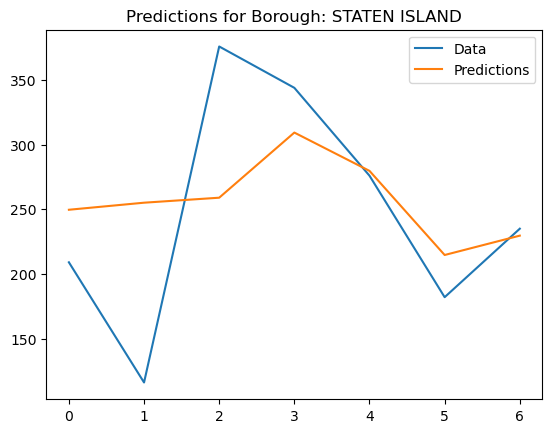

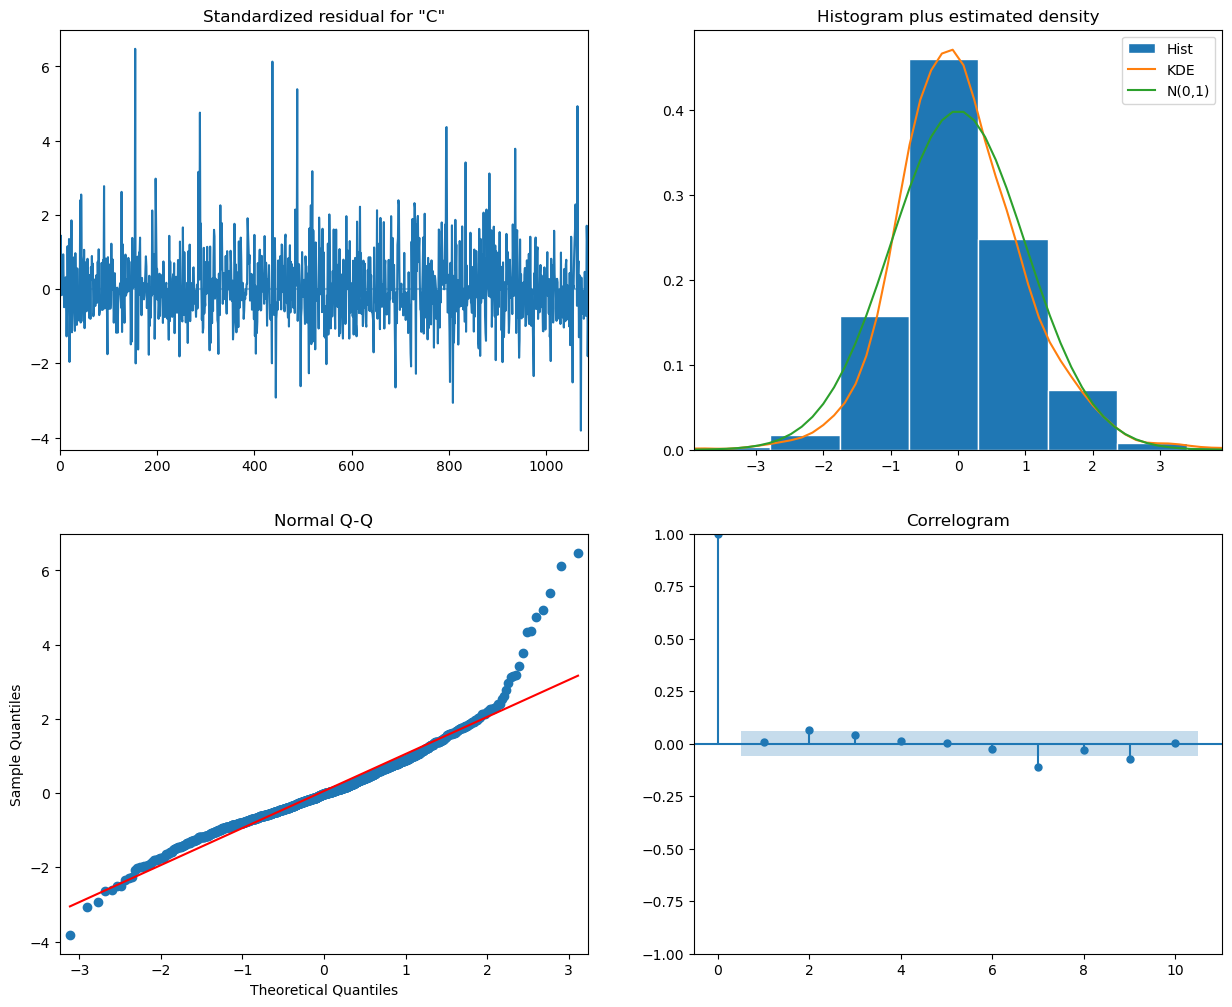

Average RMSE: 7300.5055401402515
Average MAPE: 0.24750913895681487



In [10]:
num_folds = 5

for i in boroughs_order.keys():
    print(i)
    train_portion = df[df['Borough'] == i].reset_index()

    rmse = []
    mape = []
    for j in range(num_folds):
        train_data = train_portion['Count'][1:-(7 * (num_folds-j))]
        val_data = train_portion['Count'][(-7 * (num_folds-j))-1: -7 * (num_folds-j-1)-1]

        exog_train = train_portion['DailyMeanTemp'][1:-(7 * (num_folds-j))]
        exog_val = train_portion['DailyMeanTemp'][(-7 * (num_folds-j))-1: -7 * (num_folds-j-1)-1]

        model = SARIMAX(train_data, exog_train, order = (7,1,2), disp = False)
        model_fit = model.fit(method_kwargs={"warn_convergence": False}, disp=False)
        
        predictions = model_fit.get_forecast(7, exog = exog_val)

        prediction = predictions.predicted_mean
        prediction_range = predictions.conf_int(alpha=0.05)
        deviation = (prediction - prediction_range.iloc[:,-1])/2

        rmse.append(mean_squared_error(prediction, list(val_data)))
        mape.append(mean_absolute_percentage_error(prediction, list(val_data)))


    rmse = np.array(rmse)
    mape = np.array(mape)

    plt.plot(range(len(val_data)), val_data.values)
    plt.plot(range(len(val_data)), prediction.values)
    plt.title(f'Predictions for Borough: {i}')
    plt.legend(('Data', 'Predictions'))
    plt.show()

    model_fit.plot_diagnostics(figsize=(15, 12))
    plt.show()

    print(f'Average RMSE: {np.mean(rmse)}')
    print(f'Average MAPE: {np.mean(mape)}')
    # print(model_fit.summary())

    results[f'SARIMAX_TEMP_NA_{i}'] = np.mean(mape)

    print()

We now incorporate the daily temperature and its standard deviation as exogenous variables and observe an even smaller AIC score. The p-value for the feature is also < 0.05, implying that temperature and its standard deviation are statistically significant features.

BRONX


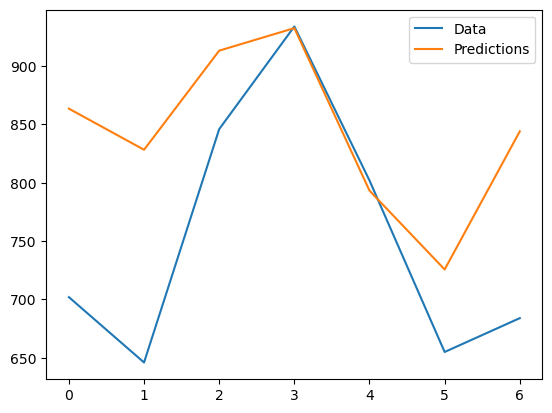

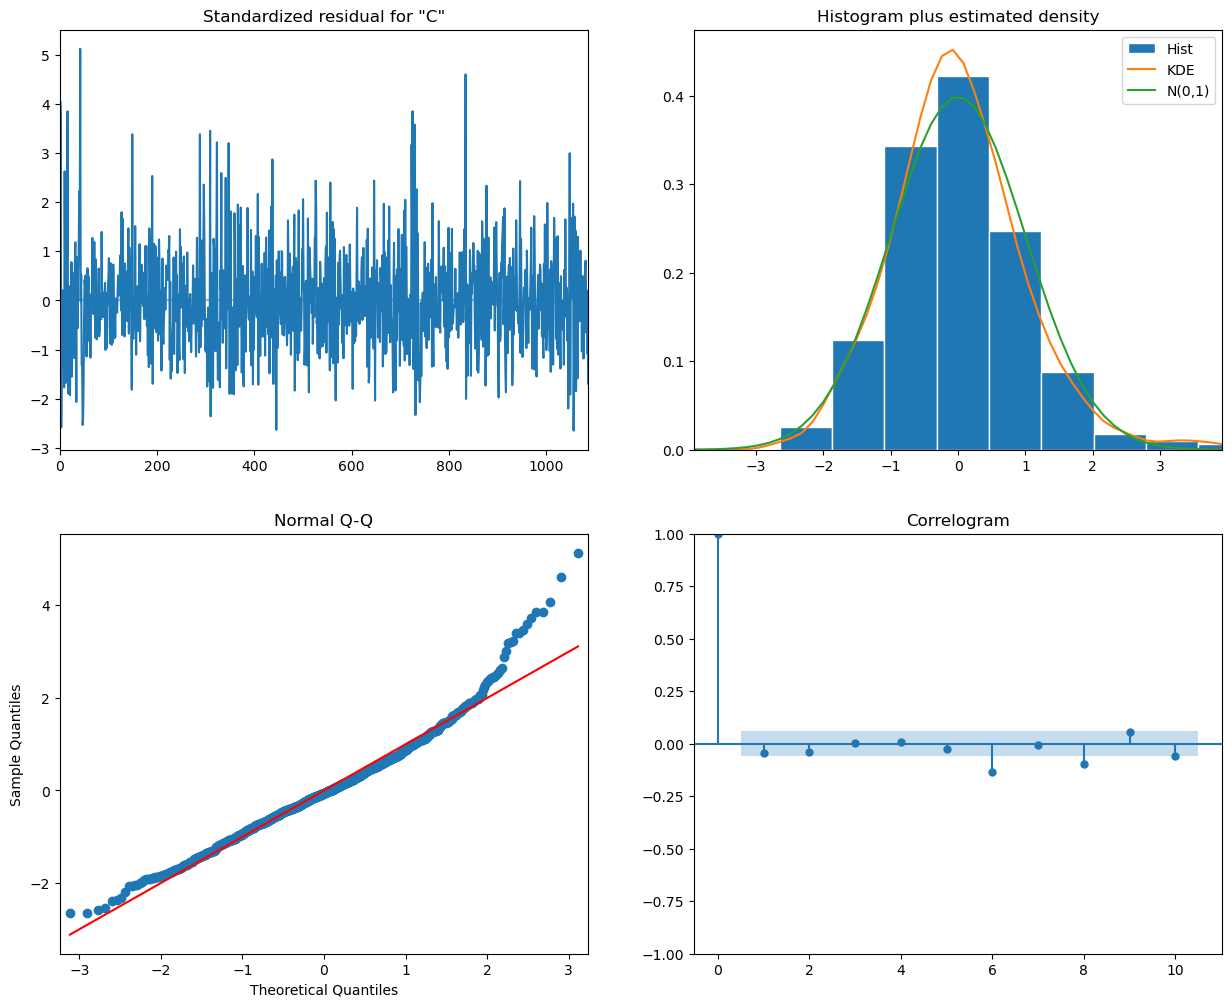

Average RMSE: 29840.211571579595
Average MAPE: 0.12916806456543925
                               SARIMAX Results                                
Dep. Variable:                  Count   No. Observations:                 1088
Model:               SARIMAX(7, 1, 2)   Log Likelihood               -6970.263
Date:                Sun, 25 Dec 2022   AIC                          13964.526
Time:                        08:53:33   BIC                          14024.420
Sample:                             0   HQIC                         13987.197
                               - 1088                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
DailyMeanTemp   -10.0641      0.688    -14.621      0.000     -11.413      -8.715
DailyTempStd     16.0068      6.726      2.380      0.0

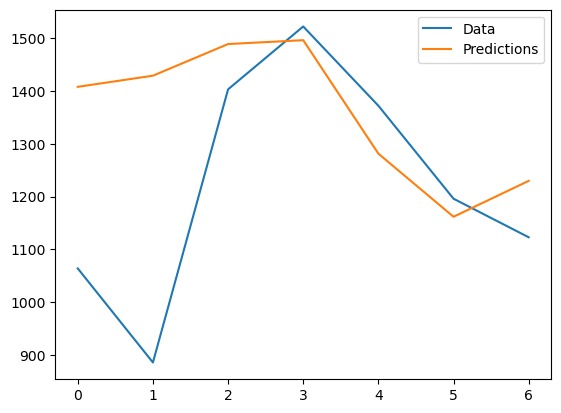

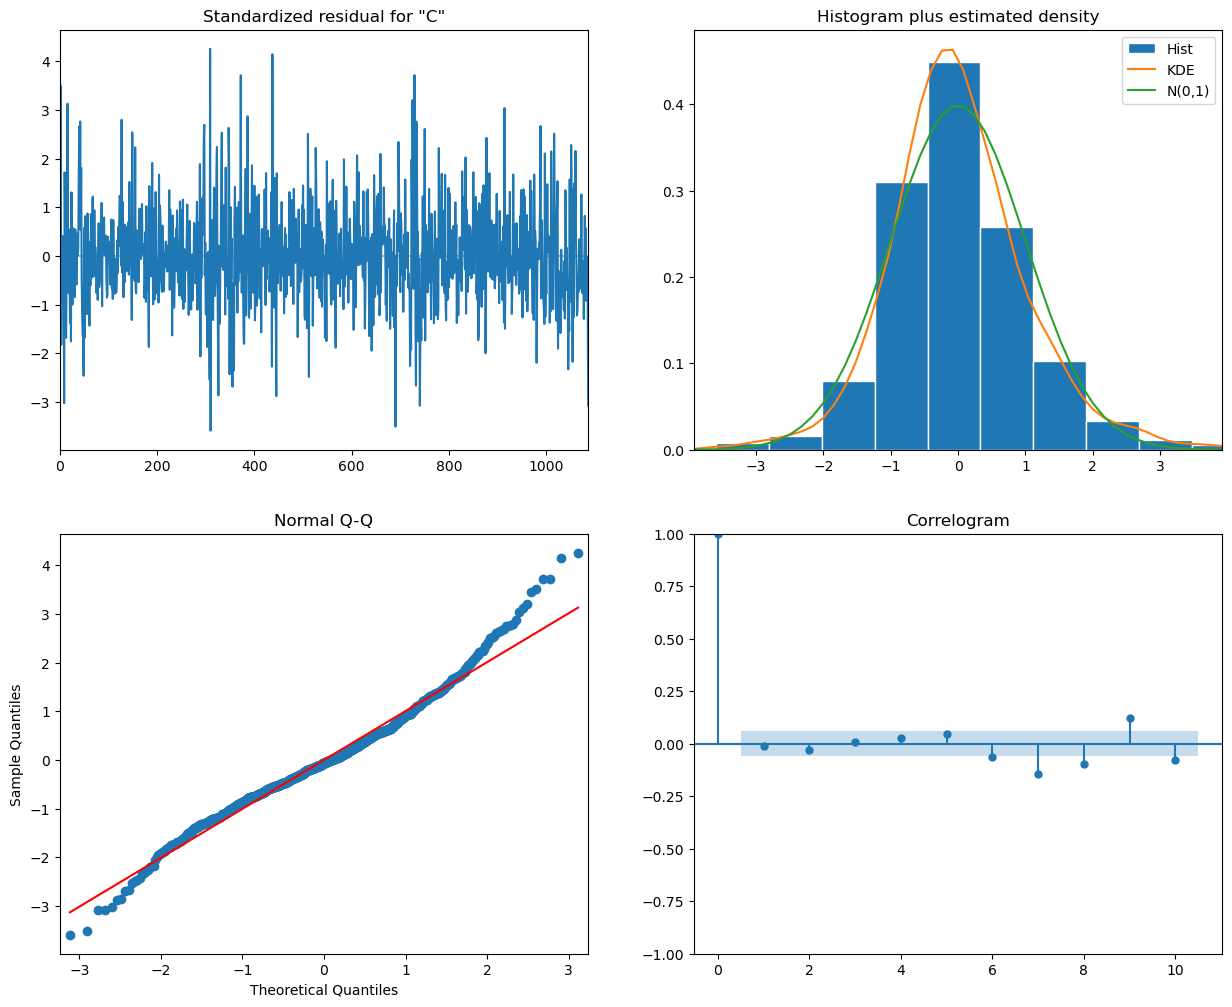

Average RMSE: 92505.27835184234
Average MAPE: 0.14288654154101643
                               SARIMAX Results                                
Dep. Variable:                  Count   No. Observations:                 1088
Model:               SARIMAX(7, 1, 2)   Log Likelihood               -7235.856
Date:                Sun, 25 Dec 2022   AIC                          14495.711
Time:                        08:53:39   BIC                          14555.606
Sample:                             0   HQIC                         14518.383
                               - 1088                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
DailyMeanTemp    -6.4178      0.794     -8.085      0.000      -7.974      -4.862
DailyTempStd     21.5906      8.078      2.673      0.00

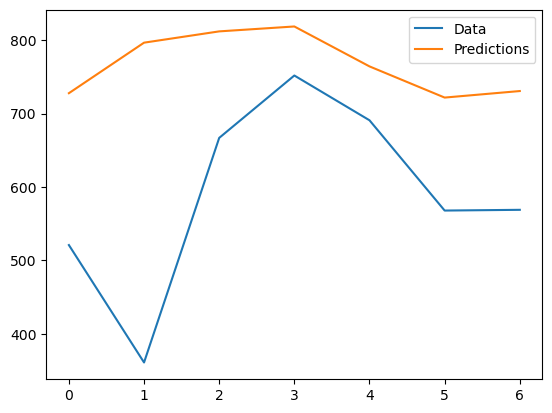

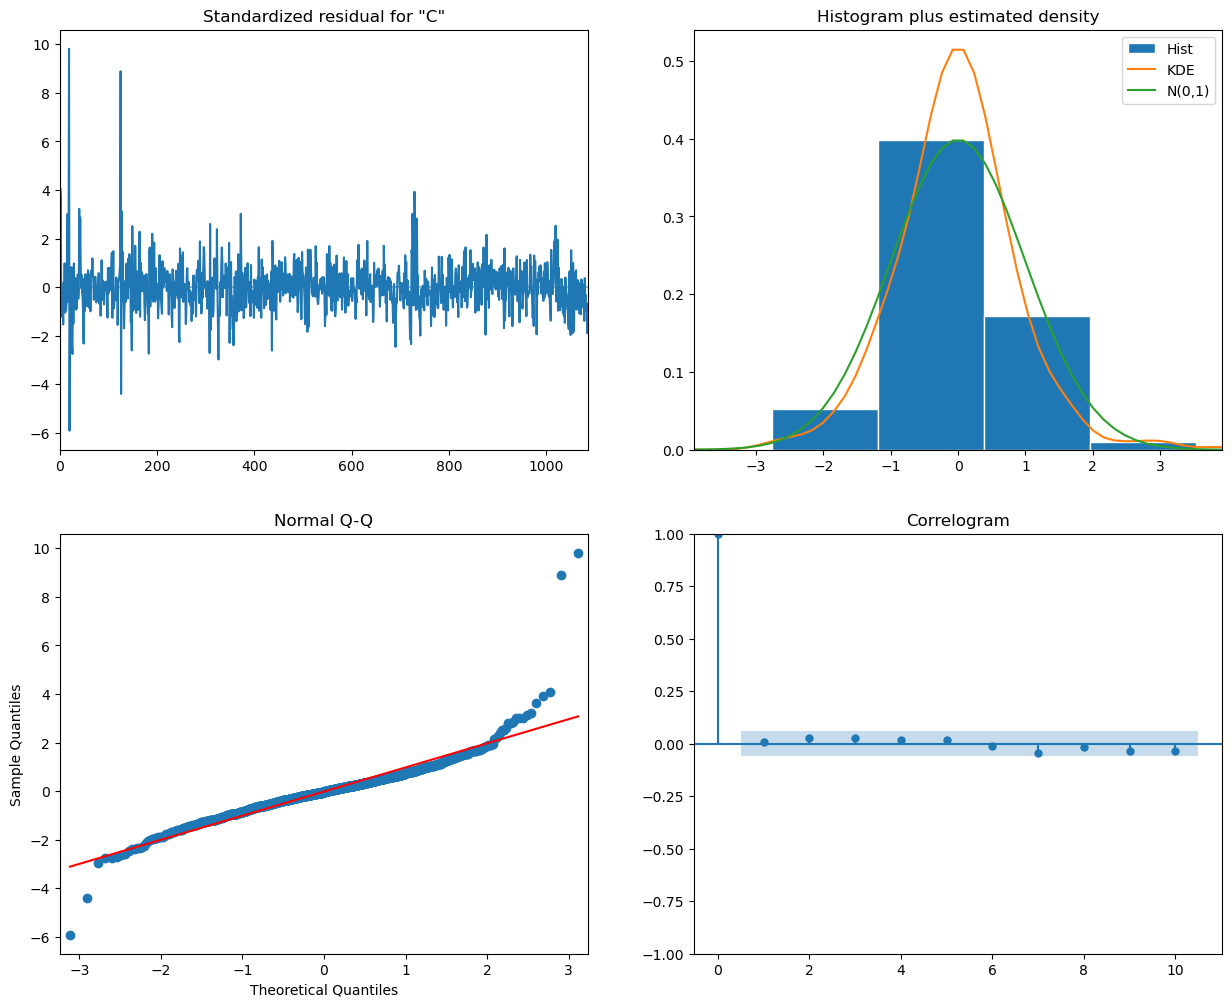

Average RMSE: 30000.194522555958
Average MAPE: 0.14643985126457842
                               SARIMAX Results                                
Dep. Variable:                  Count   No. Observations:                 1088
Model:               SARIMAX(7, 1, 2)   Log Likelihood               -6840.571
Date:                Sun, 25 Dec 2022   AIC                          13705.142
Time:                        08:53:44   BIC                          13765.036
Sample:                             0   HQIC                         13727.814
                               - 1088                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
DailyMeanTemp    -3.1260      0.621     -5.035      0.000      -4.343      -1.909
DailyTempStd     18.1656      5.742      3.164      0.0

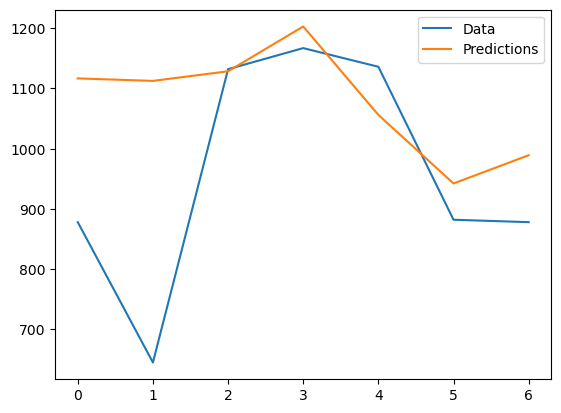

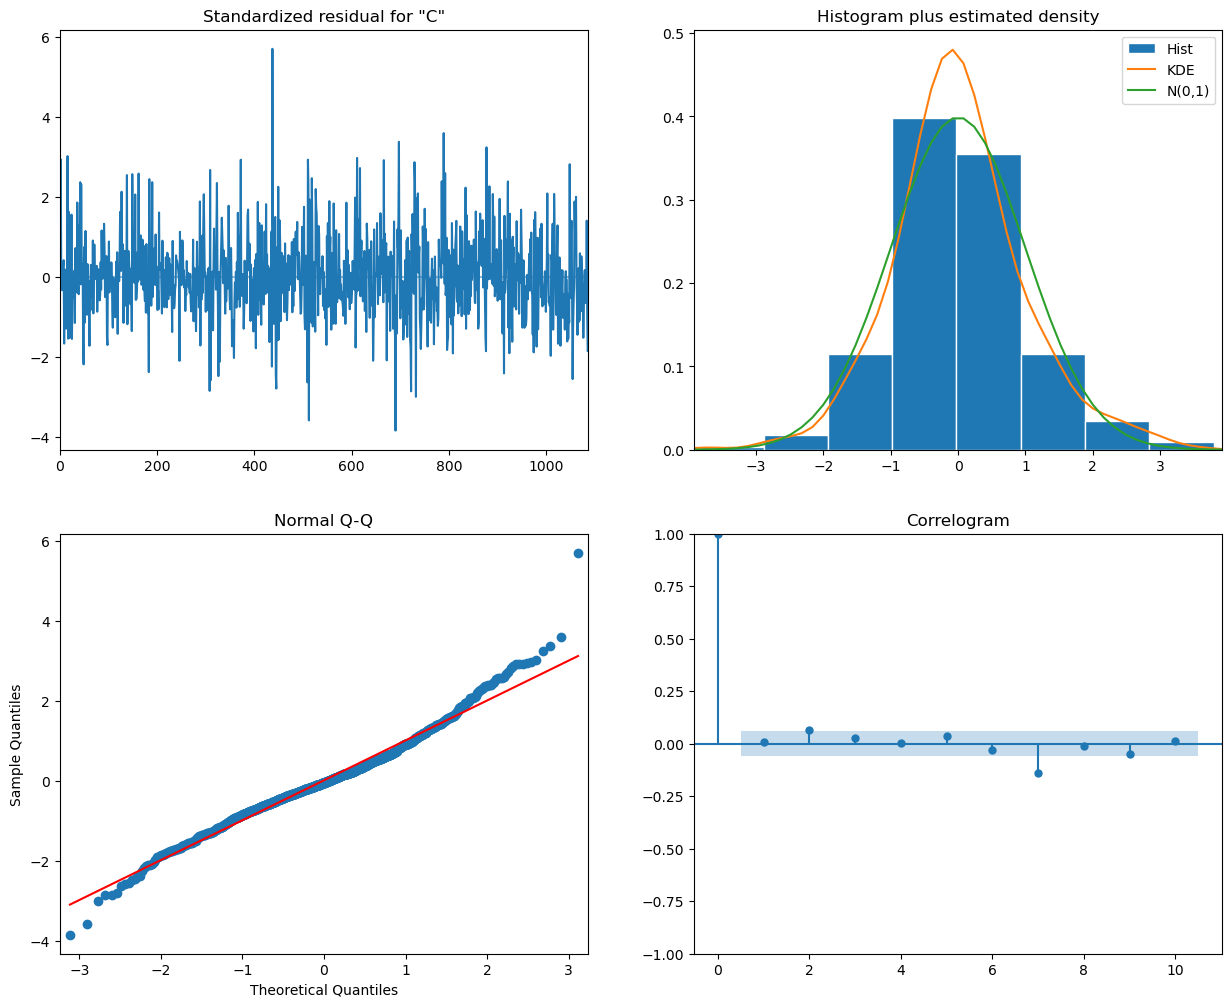

Average RMSE: 37736.509384855686
Average MAPE: 0.12535147184047224
                               SARIMAX Results                                
Dep. Variable:                  Count   No. Observations:                 1088
Model:               SARIMAX(7, 1, 2)   Log Likelihood               -6844.585
Date:                Sun, 25 Dec 2022   AIC                          13713.170
Time:                        08:53:51   BIC                          13773.064
Sample:                             0   HQIC                         13735.842
                               - 1088                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
DailyMeanTemp    -1.0233      0.547     -1.870      0.062      -2.096       0.049
DailyTempStd      6.9278      5.277      1.313      0.1

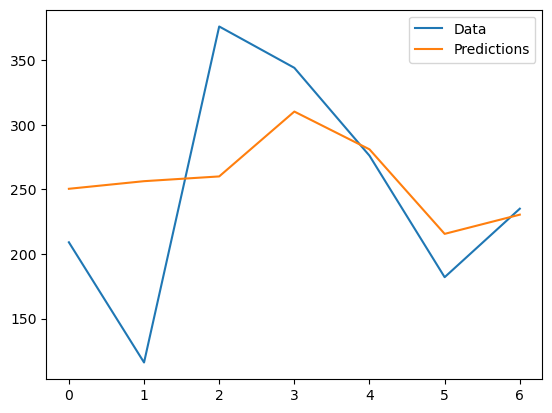

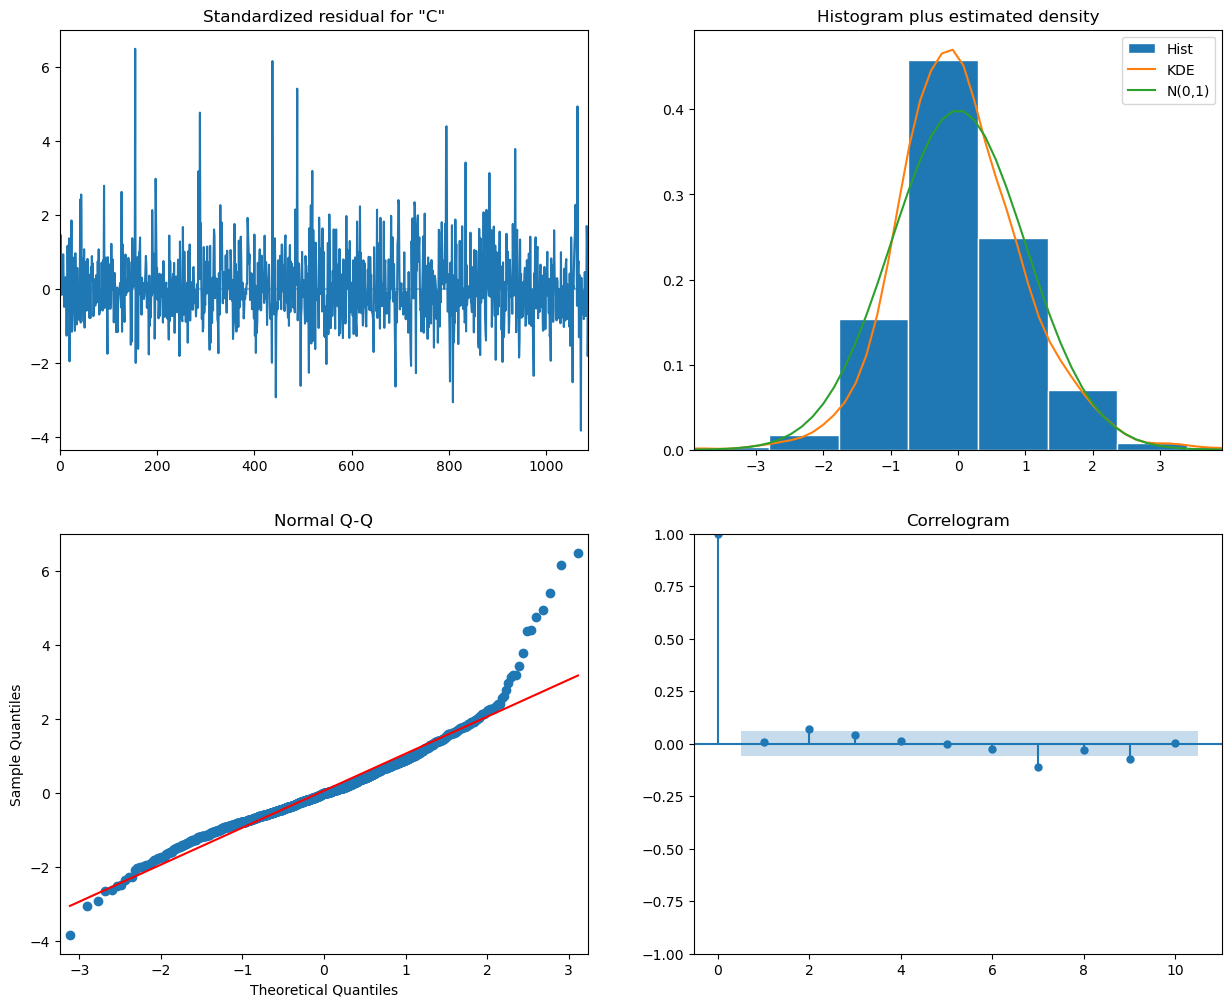

Average RMSE: 7392.259434484088
Average MAPE: 0.2475346801374554
                               SARIMAX Results                                
Dep. Variable:                  Count   No. Observations:                 1088
Model:               SARIMAX(7, 1, 2)   Log Likelihood               -5771.949
Date:                Sun, 25 Dec 2022   AIC                          11567.898
Time:                        08:53:58   BIC                          11627.792
Sample:                             0   HQIC                         11590.570
                               - 1088                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
DailyMeanTemp     0.6725      0.171      3.923      0.000       0.336       1.008
DailyTempStd      0.2647      1.469      0.180      0.857

In [11]:
num_folds = 5
for i in boroughs_order.keys():
    print(i)
    train_portion = df[df['Borough'] == i].reset_index()

    rmse = []
    mape = []
    for j in range(num_folds):
        train_data = train_portion['Count'][1:-(7 * (num_folds-j))]
        val_data = train_portion['Count'][(-7 * (num_folds-j))-1: -7 * (num_folds-j-1)-1]

        exog_train = train_portion[['DailyMeanTemp', 'DailyTempStd']][1:-(7 * (num_folds-j))]
        exog_val = train_portion[['DailyMeanTemp', 'DailyTempStd']][(-7 * (num_folds-j))-1: -7 * (num_folds-j-1)-1]

        model = SARIMAX(train_data, exog_train, order = (7,1,2))
        model_fit = model.fit(method_kwargs={"warn_convergence": False}, disp=False)
        
        predictions = model_fit.get_forecast(7, exog = exog_val)

        prediction = predictions.predicted_mean
        prediction_range = predictions.conf_int(alpha=0.05)
        deviation = (prediction - prediction_range.iloc[:,-1])/2

        rmse.append(mean_squared_error(prediction, list(val_data)))
        mape.append(mean_absolute_percentage_error(prediction, list(val_data)))


    rmse = np.array(rmse)
    mape = np.array(mape)

    plt.plot(range(len(val_data)), val_data.values)
    plt.plot(range(len(val_data)), prediction.values)
    plt.legend(('Data', 'Predictions'))
    plt.show()

    model_fit.plot_diagnostics(figsize=(15, 12))
    plt.show()

    print(f'Average RMSE: {np.mean(rmse)}')
    print(f'Average MAPE: {np.mean(mape)}')
    print(model_fit.summary())

    results[f'SARIMAX_TEMP+STD_MAPE_{i}'] = np.mean(mape)

    print()
    print()


We do the same thing as before and now add wind speed, its standard deviation. This further decreases the AIC value and the p-value for all features are less than 0.05, implying they are statistically significant.

Making predictions for the next 7 days, by first fitting the model on the entire dataset


In [12]:
results.keys()

dict_keys(['ARIMA_MAPE_BRONX', 'ARIMA_MAPE_BROOKLYN', 'ARIMA_MAPE_MANHATTAN', 'ARIMA_MAPE_QUEENS', 'ARIMA_MAPE_STATEN ISLAND', 'SARIMAX_TEMP_NA_BRONX', 'SARIMAX_TEMP_NA_BROOKLYN', 'SARIMAX_TEMP_NA_MANHATTAN', 'SARIMAX_TEMP_NA_QUEENS', 'SARIMAX_TEMP_NA_STATEN ISLAND', 'SARIMAX_TEMP+STD_MAPE_BRONX', 'SARIMAX_TEMP+STD_MAPE_BROOKLYN', 'SARIMAX_TEMP+STD_MAPE_MANHATTAN', 'SARIMAX_TEMP+STD_MAPE_QUEENS', 'SARIMAX_TEMP+STD_MAPE_STATEN ISLAND'])

In [13]:
results_df = pd.DataFrame()
results_df['Values'] = list(results.values())
results_df['Desc'] = list(results.keys())
results_df['Model'] = results_df['Desc'].apply(lambda x: x.split('_')[0])
results_df['Borough'] = results_df['Desc'].apply(lambda x: x.split('_')[-1])
results_df['Type'] = results_df['Desc'].apply(lambda x: x.split('_')[1])

Text(0.5, 1.0, 'MAPE values by Borough')

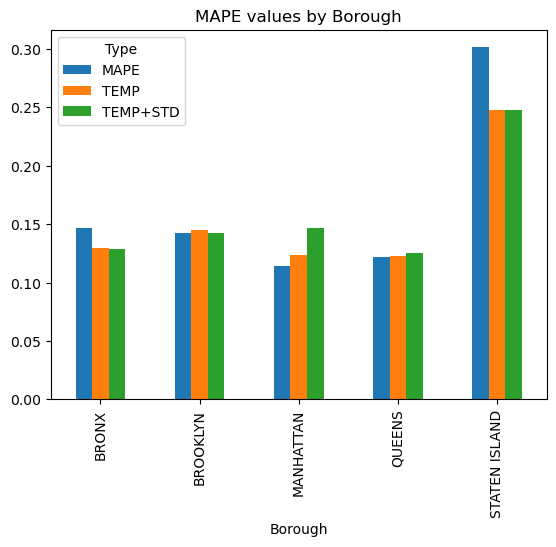

In [14]:
results_df = pd.pivot_table(results_df, values = 'Values', columns = 'Type', fill_value = 0, index = 'Borough')
results_df.plot.bar()

plt.title('MAPE values by Borough')

In [15]:
results_df.groupby('Borough')

In [16]:
future = pd.read_csv('future_values.csv')
normal_arima_boroughs = ['MANHATTAN', 'QUEENS']

In [17]:
prediction_df = {}
boroughs = list(df['Borough'].unique())

boroughs.remove('Unspecified')

============================= BRONX =============================
                               SARIMAX Results                                
Dep. Variable:                  Count   No. Observations:                 1096
Model:               SARIMAX(7, 0, 2)   Log Likelihood               -7113.555
Date:                Sun, 25 Dec 2022   AIC                          14251.111
Time:                        08:54:01   BIC                          14311.104
Sample:                             0   HQIC                         14273.811
                               - 1096                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
DailyMeanTemp    -8.5435      1.201     -7.112      0.000     -10.898      -6.189
DailyTempStd     43.1901     11.163      3.869      0.00

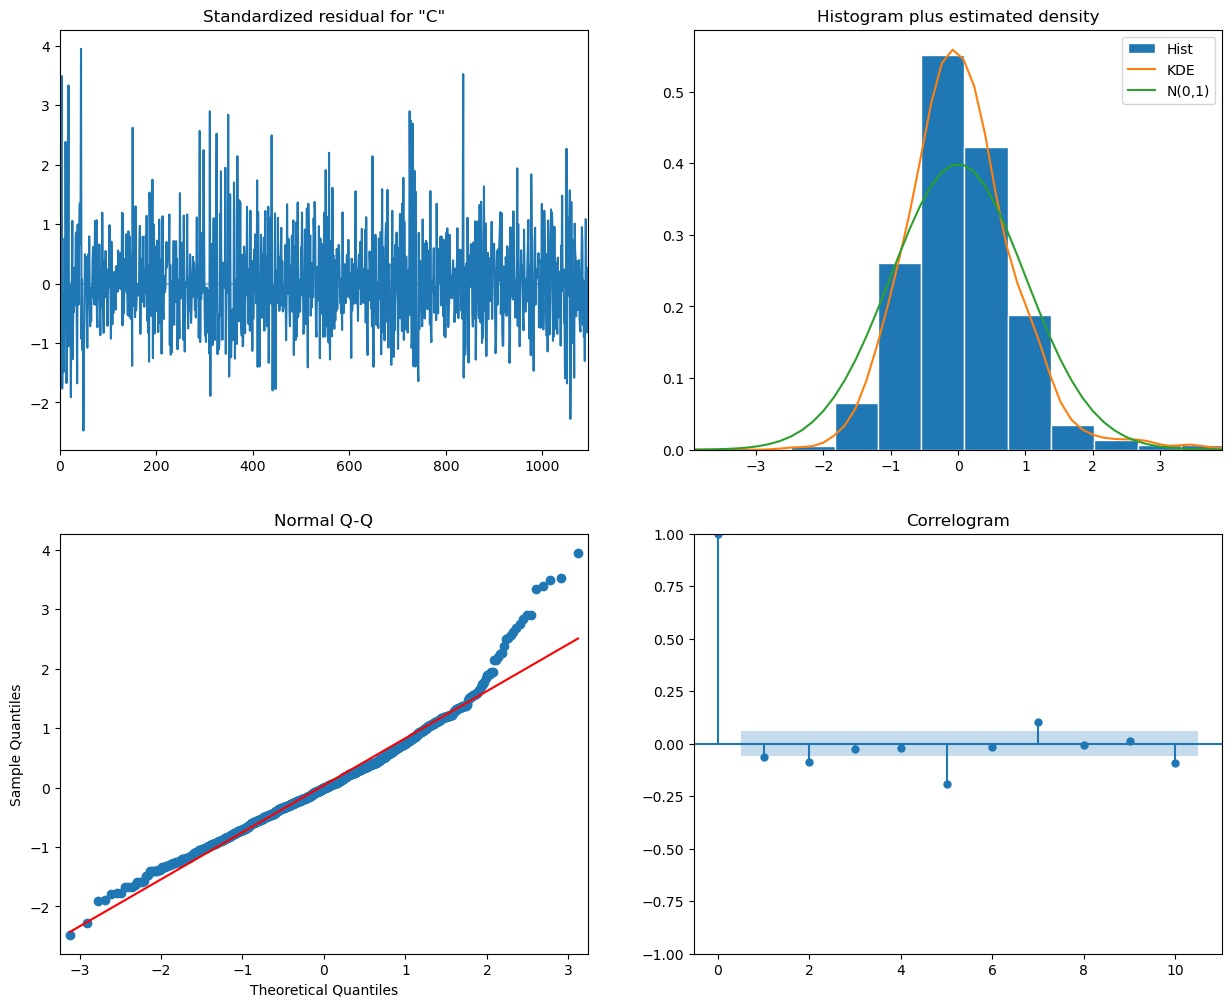

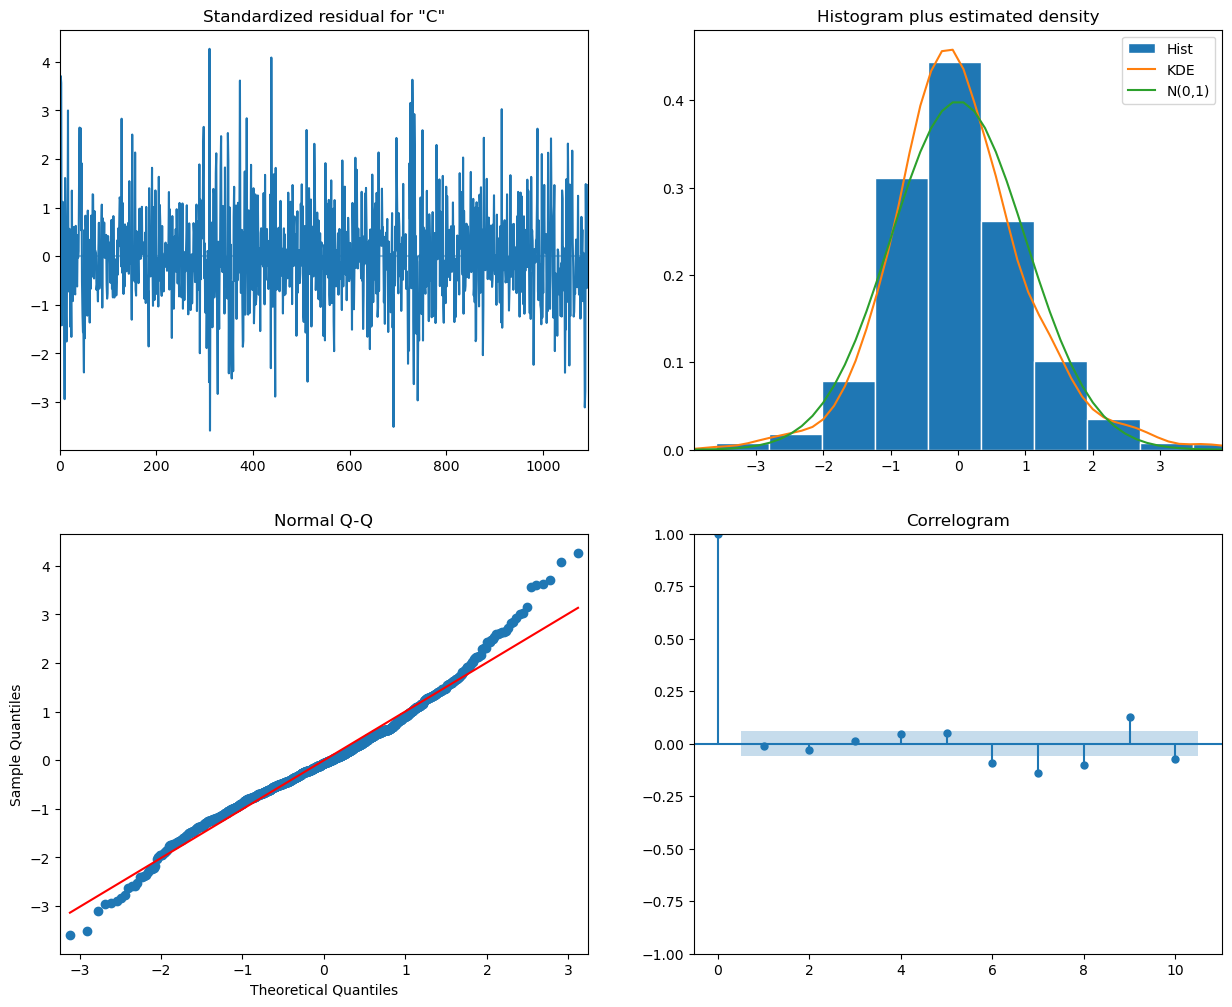

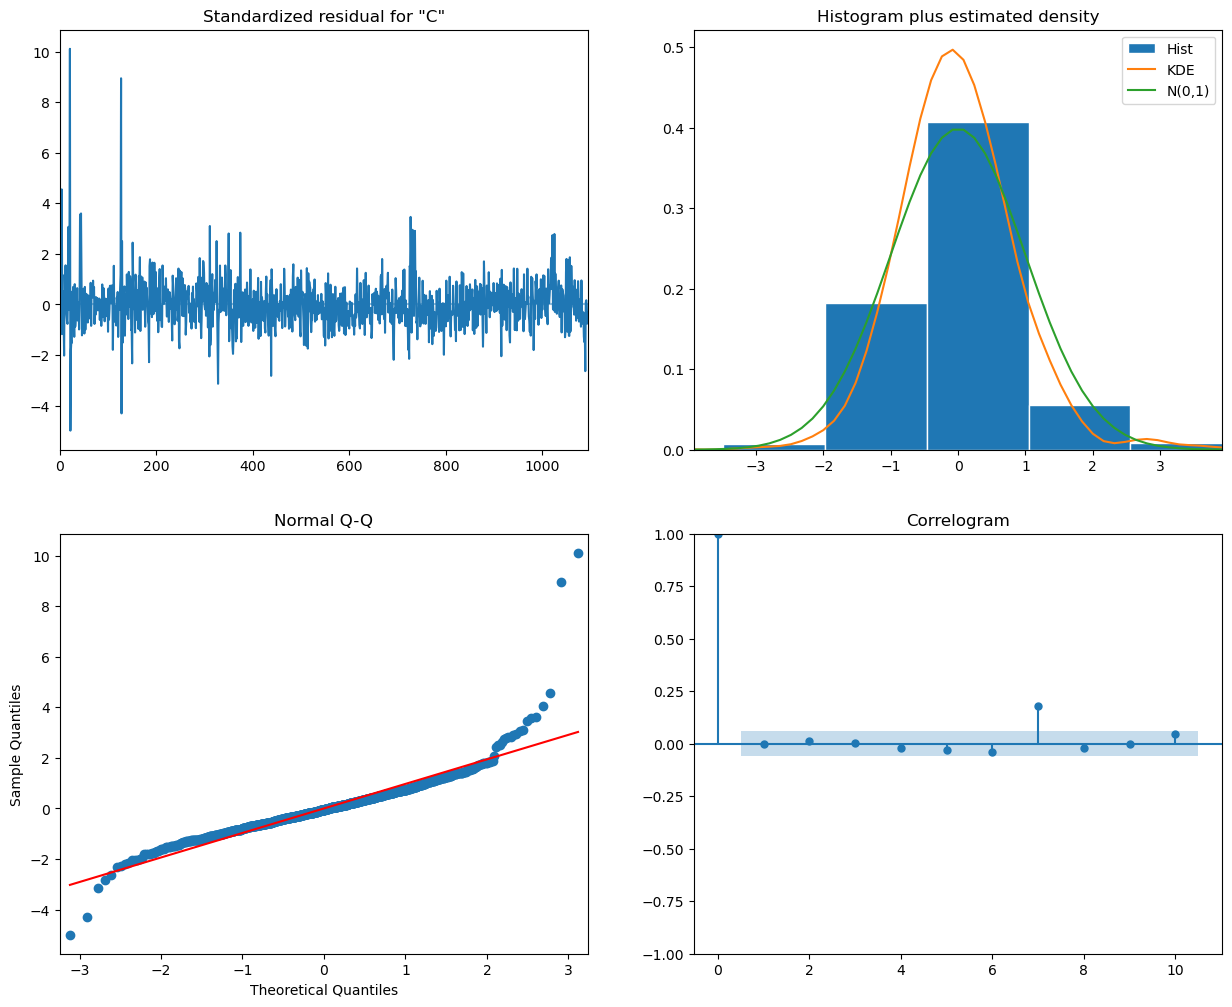

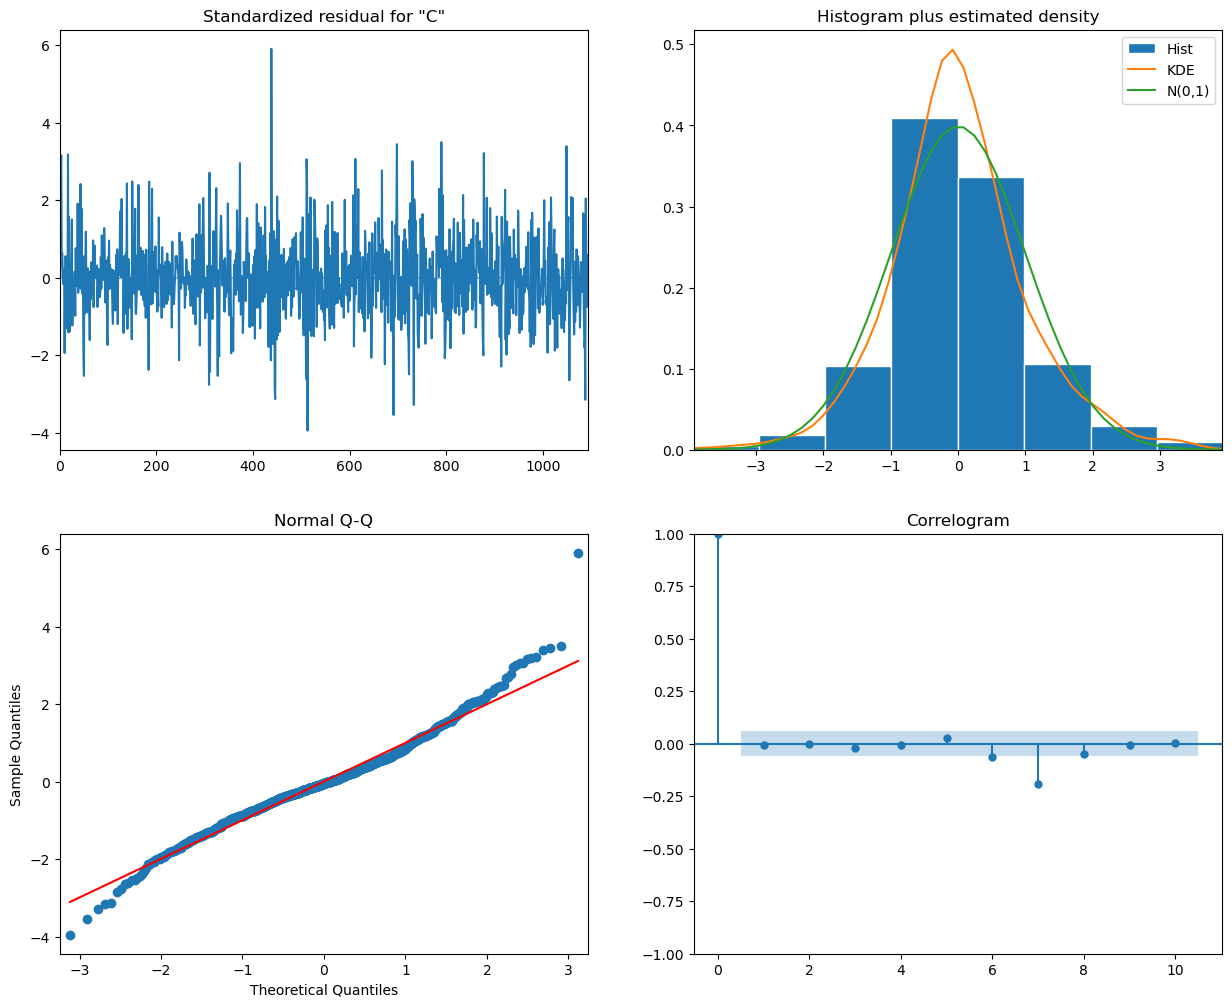

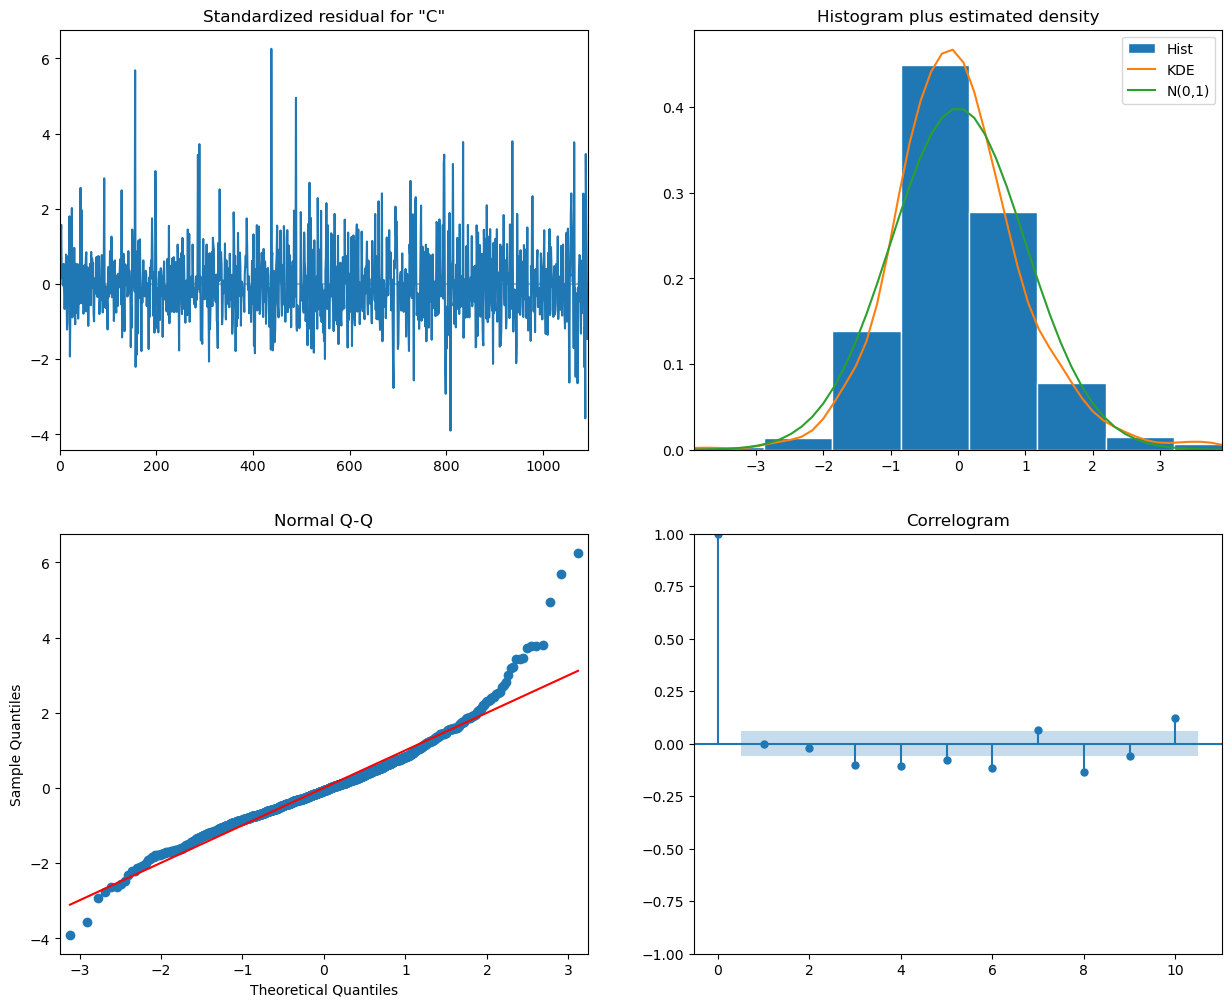

In [18]:
for i in boroughs:
    print(f"============================= {i} =============================")
    train_portion = df[df['Borough'] == i]
    
    if i not in normal_arima_boroughs:
        
        train_data = train_portion['Count']
        exog_train = train_portion[['DailyMeanTemp', 'DailyTempStd']]

        model = SARIMAX(train_data, exog_train, boroughs_order[i])
        model_fit = model.fit(method_kwargs={"warn_convergence": False}, disp=False)

        predictions = model_fit.get_forecast(7, exog = future.loc[:, ['DailyMeanTemp'	,'DailyTempStd']].tail(7))

        prediction = predictions.predicted_mean
        prediction_range = predictions.conf_int(alpha=0.05)

        prediction_df[i] = [prediction.values, prediction_range.values]
        model_fit.plot_diagnostics(figsize=(15, 12))
        print(model_fit.summary())

    else:
        train_data = train_portion['Count']

        model = ARIMA(train_data, order = boroughs_order[i])
        model_fit = model.fit(method_kwargs={"warn_convergence": False})

        predictions = model_fit.get_forecast(7)

        prediction = predictions.predicted_mean
        prediction_range = predictions.conf_int(alpha=0.05)

        prediction_df[i] = [prediction.values, prediction_range.values]
        model_fit.plot_diagnostics(figsize=(15, 12))
        print(model_fit.summary())


In [19]:
prediction_df

{'BRONX': [array([818.63931762, 714.77509778, 799.63327651, 833.98432247,
         713.54022258, 737.95389311, 862.65547737]),
  array([[ 443.75797605, 1193.52065919],
         [ 253.51507081, 1176.03512474],
         [ 292.80116615, 1306.46538686],
         [ 307.31002899, 1360.65861595],
         [ 177.13514916, 1249.945296  ],
         [ 176.06165813, 1299.8461281 ],
         [ 268.89493868, 1456.41601606]])],
 'BROOKLYN': [array([1245.3071017 , 1381.58151856, 1515.62769366, 1352.37848119,
         1209.7408531 , 1261.61518286, 1341.34028414]),
  array([[ 877.84355284, 1612.77065056],
         [ 957.85731371, 1805.3057234 ],
         [1079.57685124, 1951.67853609],
         [ 911.56346455, 1793.19349782],
         [ 767.73581931, 1651.74588689],
         [ 819.376512  , 1703.85385371],
         [ 891.08220389, 1791.59836439]])],
 'MANHATTAN': [array([756.50023801, 810.45656631, 818.98864074, 789.39819835,
         751.39799969, 743.15949987, 779.19772136]),
  array([[ 493.7680687 , 

Predictions from the model

In [20]:
final_predictions = []
bounds = []
low_bound = []
upper_bound = []
for k, v in prediction_df.items():
    final_predictions.append(v[0])
    bounds.append(v[1])

final_predictions = np.array(final_predictions)
bounds = np.array(bounds)

In [21]:
final_predictions = final_predictions.sum(axis = 0)

In [22]:
bounds

array([[[ 443.75797605, 1193.52065919],
        [ 253.51507081, 1176.03512474],
        [ 292.80116615, 1306.46538686],
        [ 307.31002899, 1360.65861595],
        [ 177.13514916, 1249.945296  ],
        [ 176.06165813, 1299.8461281 ],
        [ 268.89493868, 1456.41601606]],

       [[ 877.84355284, 1612.77065056],
        [ 957.85731371, 1805.3057234 ],
        [1079.57685124, 1951.67853609],
        [ 911.56346455, 1793.19349782],
        [ 767.73581931, 1651.74588689],
        [ 819.376512  , 1703.85385371],
        [ 891.08220389, 1791.59836439]],

       [[ 493.7680687 , 1019.23240731],
        [ 531.64589313, 1089.26723949],
        [ 536.73969781, 1101.23758367],
        [ 502.07288386, 1076.72351285],
        [ 460.12975887, 1042.6662405 ],
        [ 450.56530828, 1035.75369146],
        [ 485.92504343, 1072.4703993 ]],

       [[ 579.61084886, 1099.91375898],
        [ 764.80855386, 1325.91765386],
        [ 847.86388814, 1416.02735695],
        [ 775.93798977, 1348.16282

In [23]:
len(bounds)

5

In [24]:
low_bound = [i[:,0] for i in bounds]
upper_bound = [i[:,1] for i in bounds]

low_bound = np.array(low_bound)
upper_bound = np.array(upper_bound)

In [25]:
low_bound = low_bound.sum(axis = 0)
upper_bound = upper_bound.sum(axis = 0)

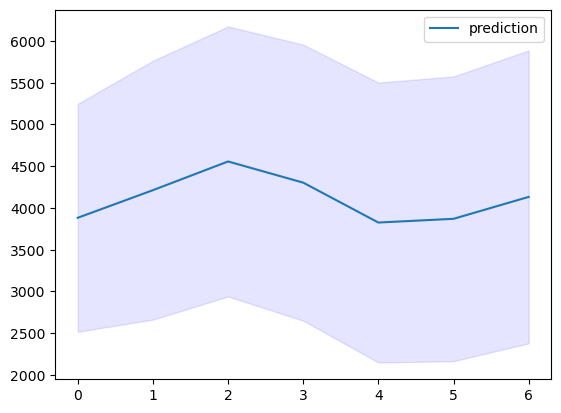

In [26]:
plt.plot(list(range(0, 7)), final_predictions, label = 'prediction')
plt.fill_between(list(range(0, 7)), low_bound, upper_bound, color='b', alpha=.1)
plt.legend()